# Risk Taking Task (RTT)

<div>
    <p style="float: left;"><img src="images/gambling_task.png" alt="Drawing" style="width: 200px; border-right:30px solid white"/>
    <ol style="padding-left:240px">
        <li>Participants chose between gambles and certain choices.</li>
        <li>Three trial types:
            <ul>
                <li>Win/nothing vs. certain win (win trials)</li>
                <li>Loss/nothing vs. certain loss (loss trials)</li>
                <li>Win/loss vs. nothing (mixed trials)</li>
            </ul>
        </li>
        <li>For each type, we calculate the percentage gambles.</li>
    </ol>

</div>


In [ ]:
%run ../src/wp1/init.ipynb
%reload_ext rpy2.ipython
from wp1 import stats, data_provider as dp # This is the local wp1 package in analysis/src

In [ ]:
%%capture
%%R
library(lme4)
library(lmerTest)
library(ggeffects)
control=glmerControl(optimizer = "bobyqa", optCtrl=list(maxfun=1e5))  #mixed logistic regression

In [ ]:
# We're running these analyses on the baseline GBE data (data from first two GBE sessions; when performed on same day).
bs = dp.get_gbe_baseline_data() # ToDo: add sample variable ("initial" vs. "replication")
bs = bs[bs.initial] # For now, we only look at the initial dataset
print("Risk taking data from %s sessions is missing."%bs['RewardAndHappinessGame'].isnull().sum())
bs = bs[bs['RewardAndHappinessGame'].isnull()==False]
print("We have data from %s participants and %s sessions."%(len(bs.participant.unique()), len(bs)))

Risk taking data from 8 sessions is missing.
We have data from 297 participants and 545 sessions.


In [ ]:
dp = reload(dp)
df = dp.get_rtt_data(bs)
df = df[df.initial]

# Mean method
Here we simply calculate the percentage gambles, separately for each participant, session, and condition.

Example data for the win condition in one participant-session:

In [ ]:
example = df.query("participant=='b001' and baseline_session=='Session 1' and trial_type == 'win'")[['participant','baseline_session','trial_type','gambled']]
display(example.reset_index(drop=True))
print("The participants' percentage gambles in this session is %.2f%%"%(example.gambled.mean()*100))

,participant,baseline_session,trial_type,gambled
0,b001,Session 1,win,True
1,b001,Session 1,win,False
2,b001,Session 1,win,True
3,b001,Session 1,win,True
4,b001,Session 1,win,False
5,b001,Session 1,win,False
6,b001,Session 1,win,False
7,b001,Session 1,win,False
8,b001,Session 1,win,True
9,b001,Session 1,win,True


The participants' percentage gambles in this session is 54.55%


In [ ]:
def get_percentage_gamble(df):
    return df.groupby(['participant','baseline_session']).agg({'gambled':'mean','gbe_baseline_index':'first'}).set_index('gbe_baseline_index')
    
for trial_type in ['win','loss','mixed']:
    type_data = df.query('trial_type=="%s"'%trial_type)
    bs['perc_gamble_%s'%trial_type] = get_percentage_gamble(type_data)
    bs['perc_gamble_%s_even'%trial_type] = get_percentage_gamble(type_data.query('is_even==True'))
    bs['perc_gamble_%s_uneven'%trial_type] = get_percentage_gamble(type_data.query('is_even==False'))

## Internal consistency (split-half reliability)

### Percentage gamble win

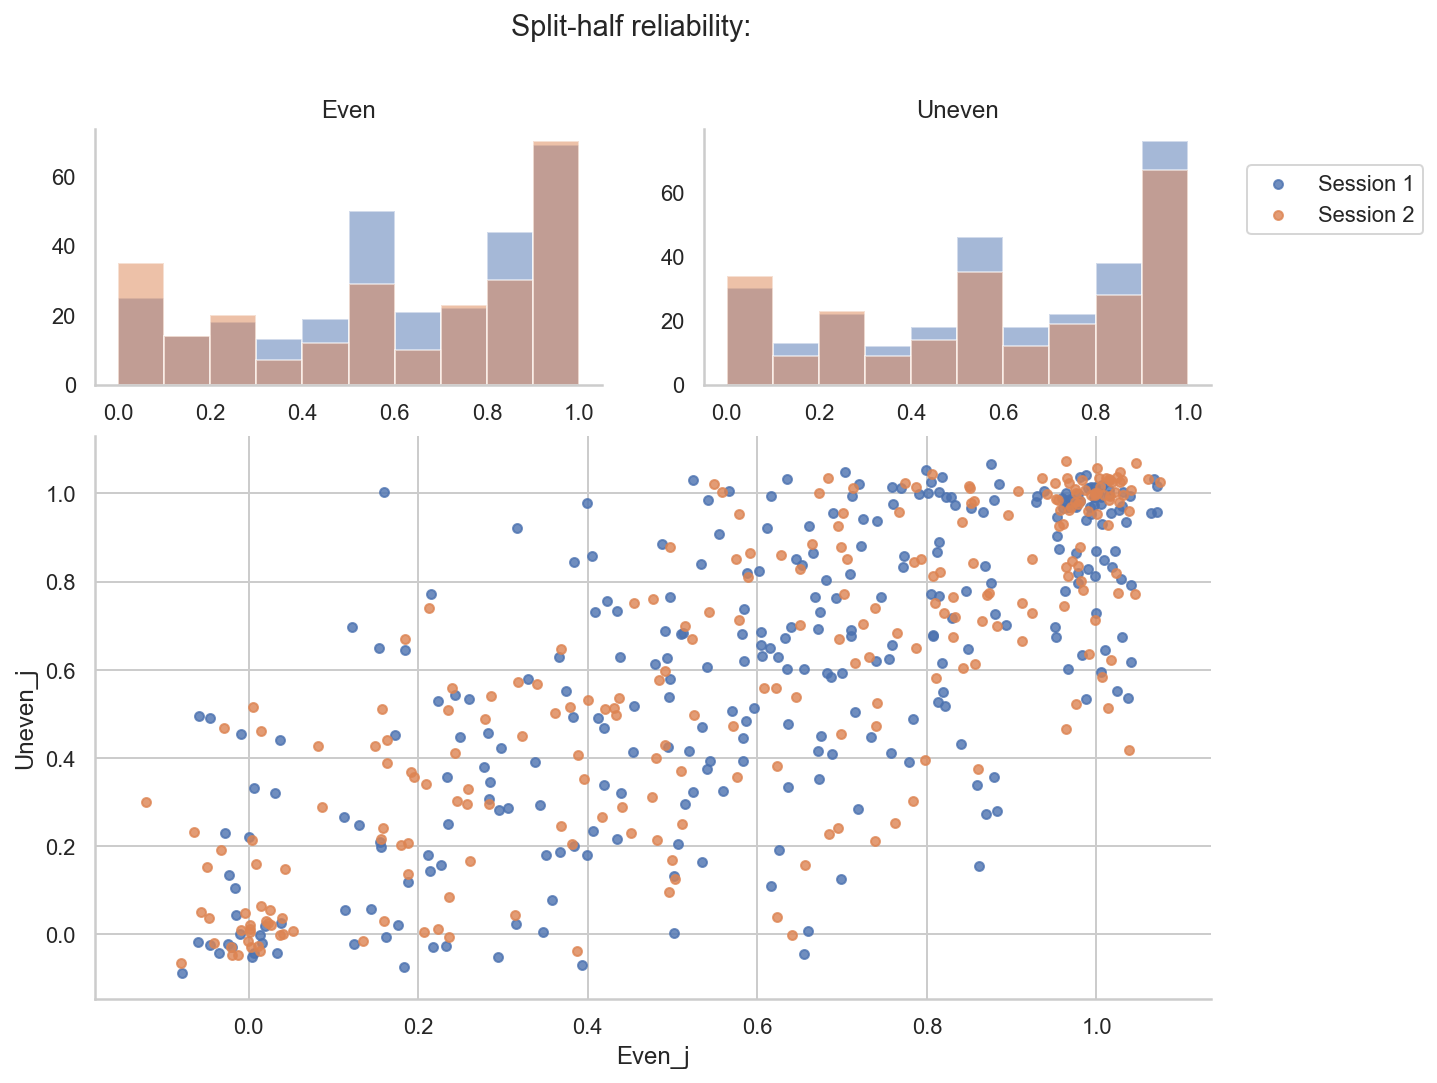

In [ ]:
sb_mean_win = stats.analyze_split_half(bs, "perc_gamble_win_even", "perc_gamble_win_uneven", add_jitter = True)

### Percentage gambles loss

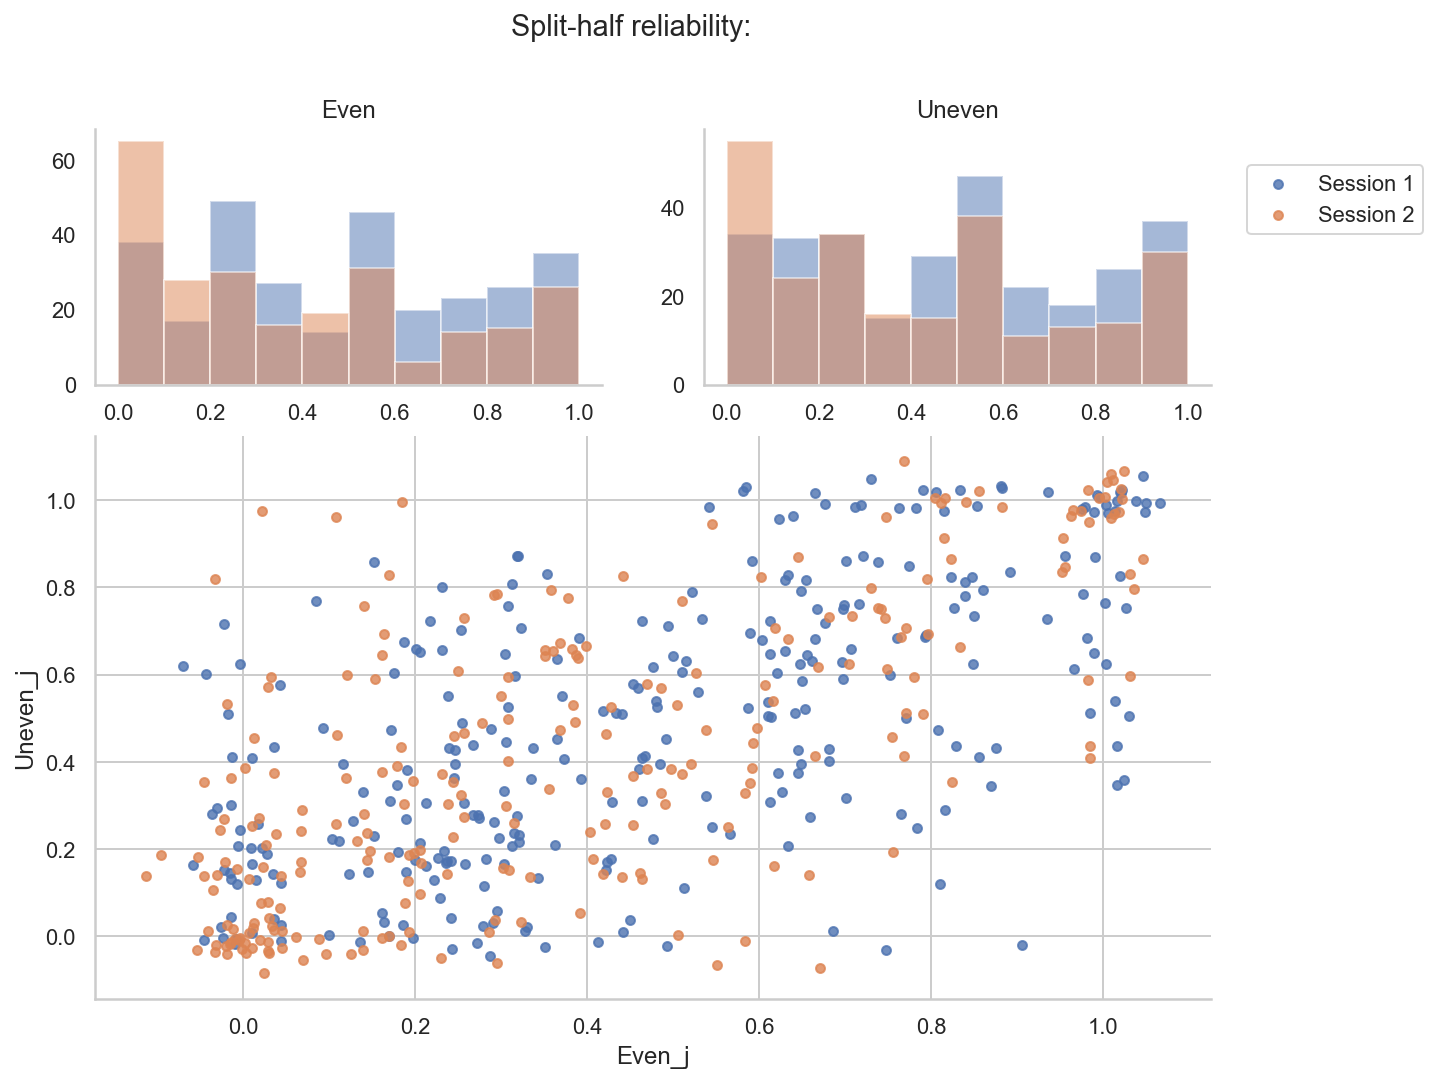

In [ ]:
sb_mean_loss = stats.analyze_split_half(bs, "perc_gamble_loss_even", "perc_gamble_loss_uneven", add_jitter = True)

### Percentage gambles mixed

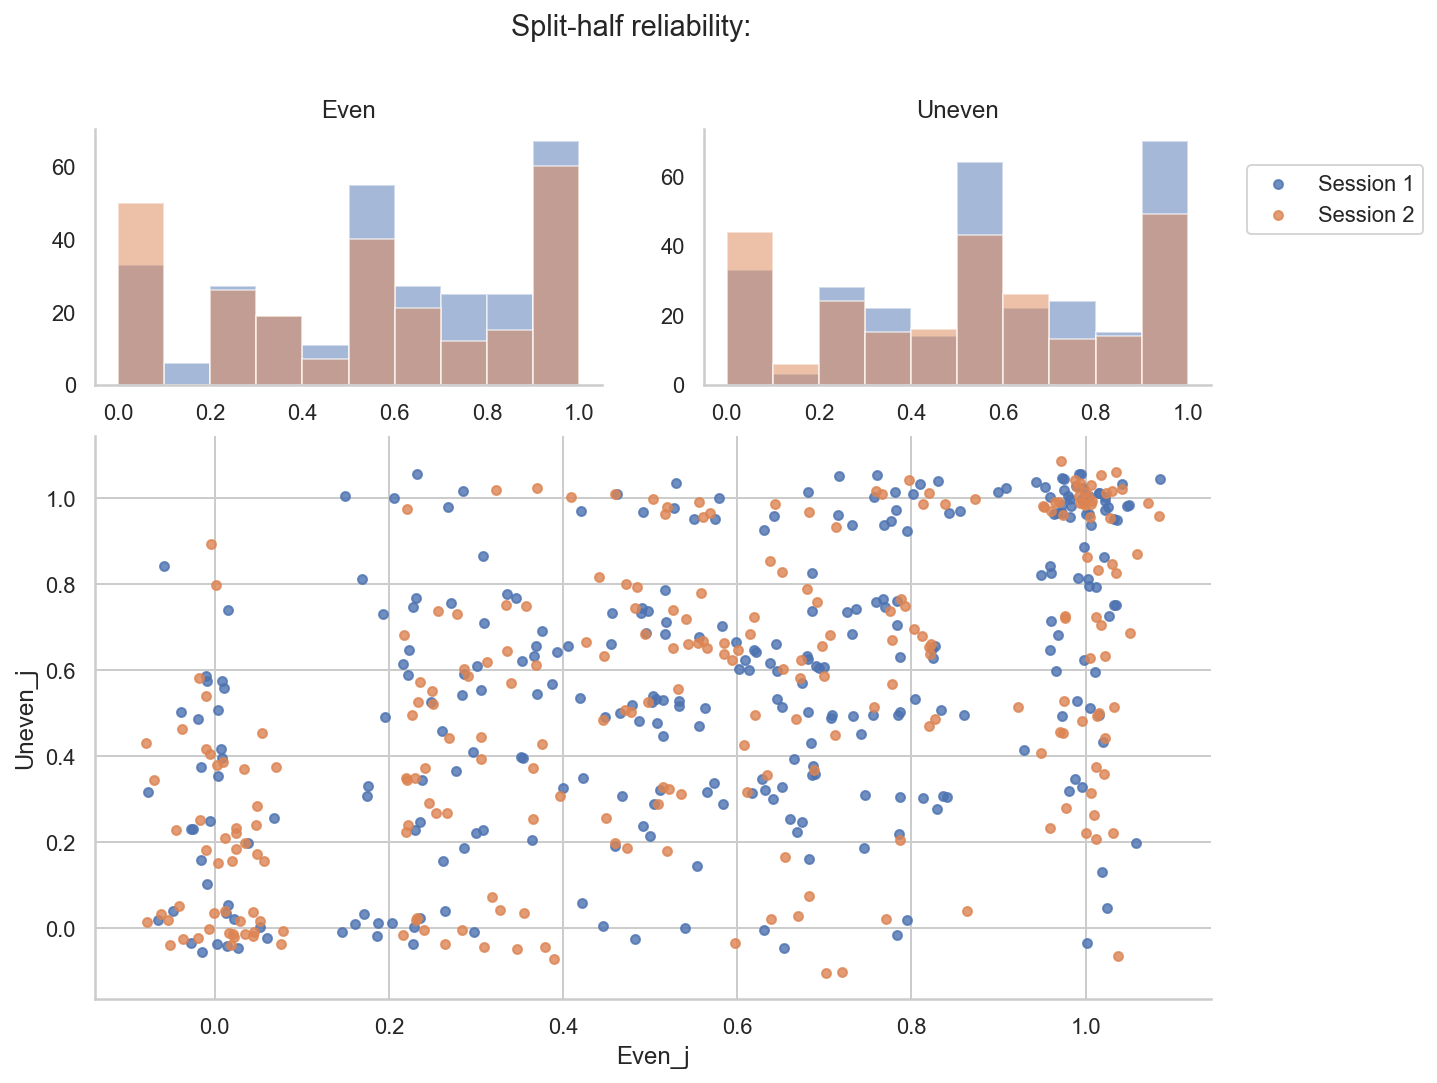

In [ ]:
sb_mean_mixed = stats.analyze_split_half(bs, "perc_gamble_mixed_even", "perc_gamble_mixed_uneven", add_jitter = True)

## Test-retest reliability

### Percentage gambles win

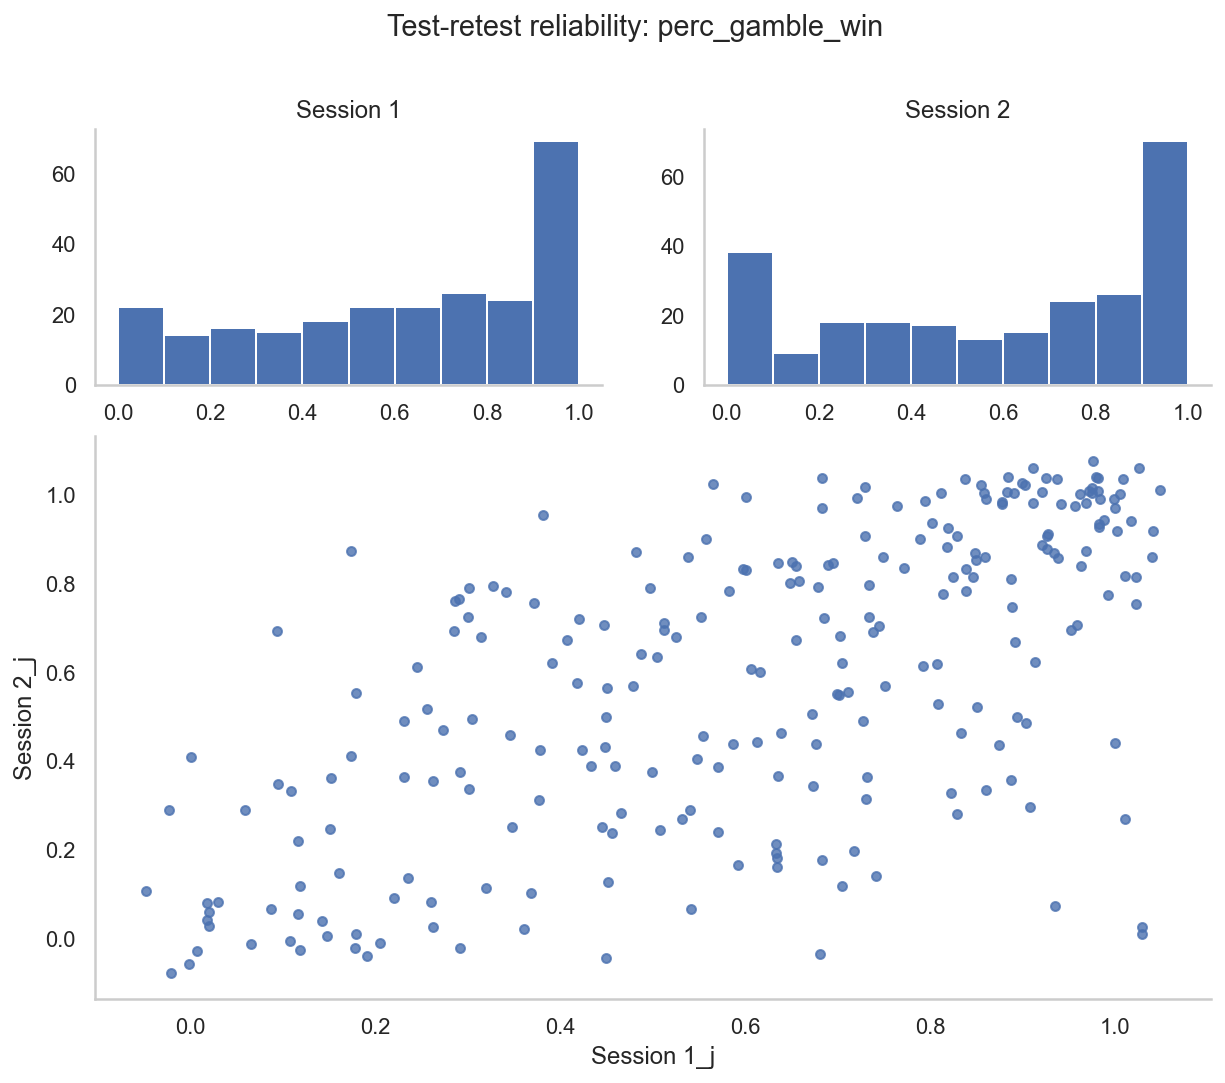

R[write to console]: Loading required package: arrow

R[write to console]: 
Attaching package: ‘arrow’


R[write to console]: The following object is masked from ‘package:utils’:

    timestamp


R[write to console]: Loading required package: psych



,type,ICC,F,df1,df2,p,lower bound,upper bound,description
0,ICC1,0.758,13.540,247.0,744.0,0.0,0.723,0.791,".76 (.72, .79)"
1,ICC2,0.758,13.618,247.0,741.0,0.0,0.723,0.791,".76 (.72, .79)"
2,ICC3,0.759,13.618,247.0,741.0,0.0,0.725,0.792,".76 (.72, .79)"
3,ICC1k,0.926,13.540,247.0,744.0,0.0,0.913,0.938,".93 (.91, .94)"
4,ICC2k,0.926,13.618,247.0,741.0,0.0,0.913,0.938,".93 (.91, .94)"
5,ICC3k,0.927,13.618,247.0,741.0,0.0,0.913,0.938,".93 (.91, .94)"


,type,variance,Percent
0,Participant,0.079,0.758
1,Session,0.000,0.001
2,Residual,0.025,0.240
3,Total,0.104,1.000


In [ ]:
stats = reload(stats)
iccs_mean_win = stats.analyze_reliability(bs, "perc_gamble_win", add_jitter = True)

The task's reliability is moderate to good (based on confidence intervals and according to criteria by Koo and Li, 2016).

### Percentage gambles losses

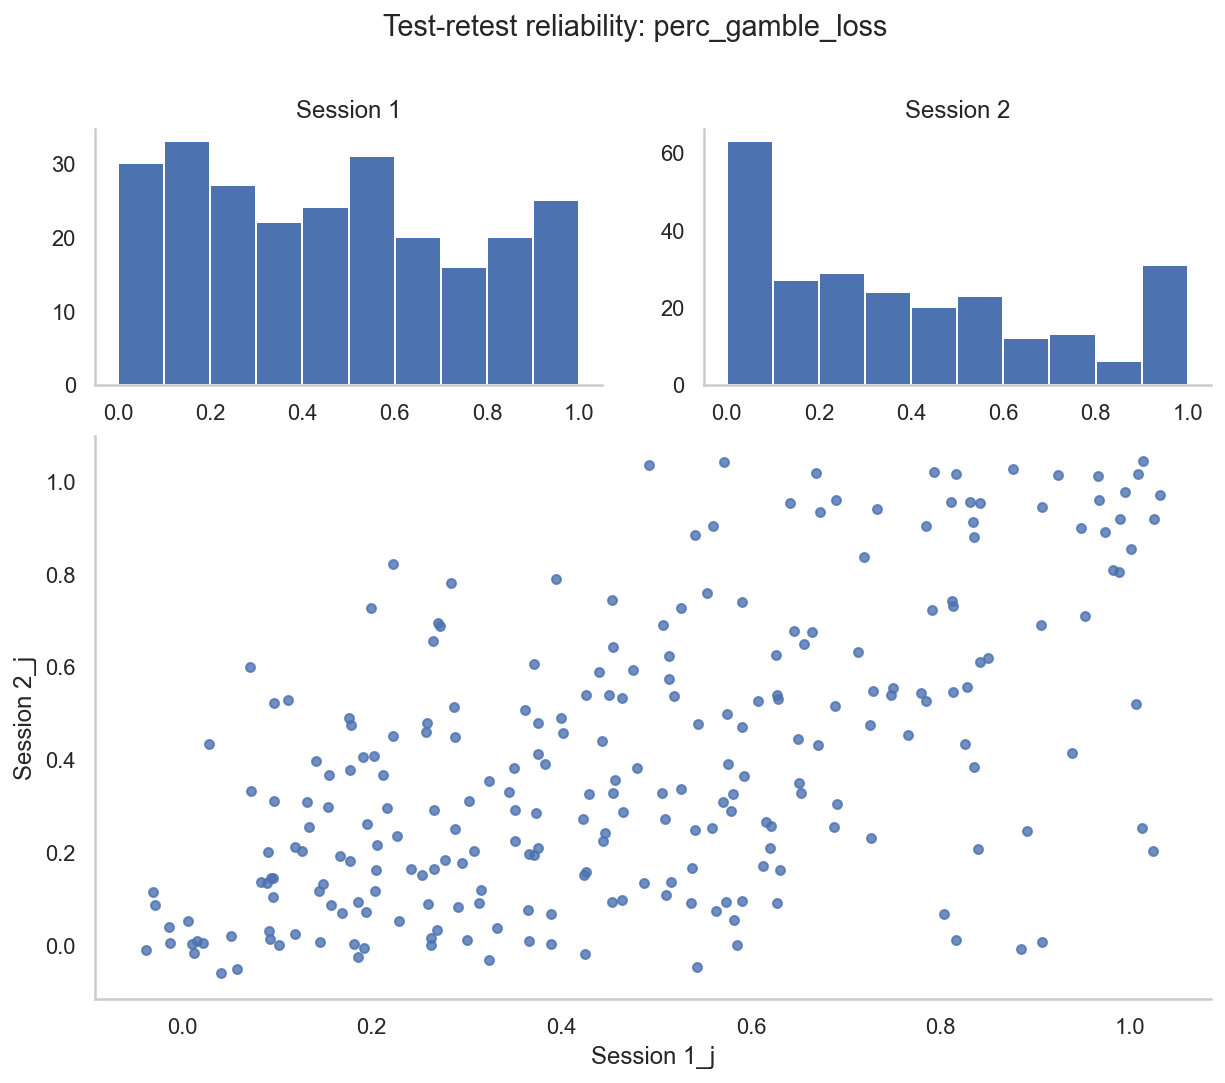

,type,ICC,F,df1,df2,p,lower bound,upper bound,description
0,ICC1,0.710,10.787,247.0,744.0,0.0,0.670,0.748,".71 (.67, .75)"
1,ICC2,0.711,11.573,247.0,741.0,0.0,0.667,0.752,".71 (.67, .75)"
2,ICC3,0.726,11.573,247.0,741.0,0.0,0.687,0.762,".73 (.69, .76)"
3,ICC1k,0.907,10.787,247.0,744.0,0.0,0.890,0.922,".91 (.89, .92)"
4,ICC2k,0.908,11.573,247.0,741.0,0.0,0.889,0.924,".91 (.89, .92)"
5,ICC3k,0.914,11.573,247.0,741.0,0.0,0.898,0.927,".91 (.90, .93)"


,type,variance,Percent
0,Participant,0.063,0.711
1,Session,0.002,0.020
2,Residual,0.024,0.269
3,Total,0.089,1.000


In [ ]:
iccs_mean_loss = stats.analyze_reliability(bs, "perc_gamble_loss", add_jitter = True)

### Percentage gambles mixed

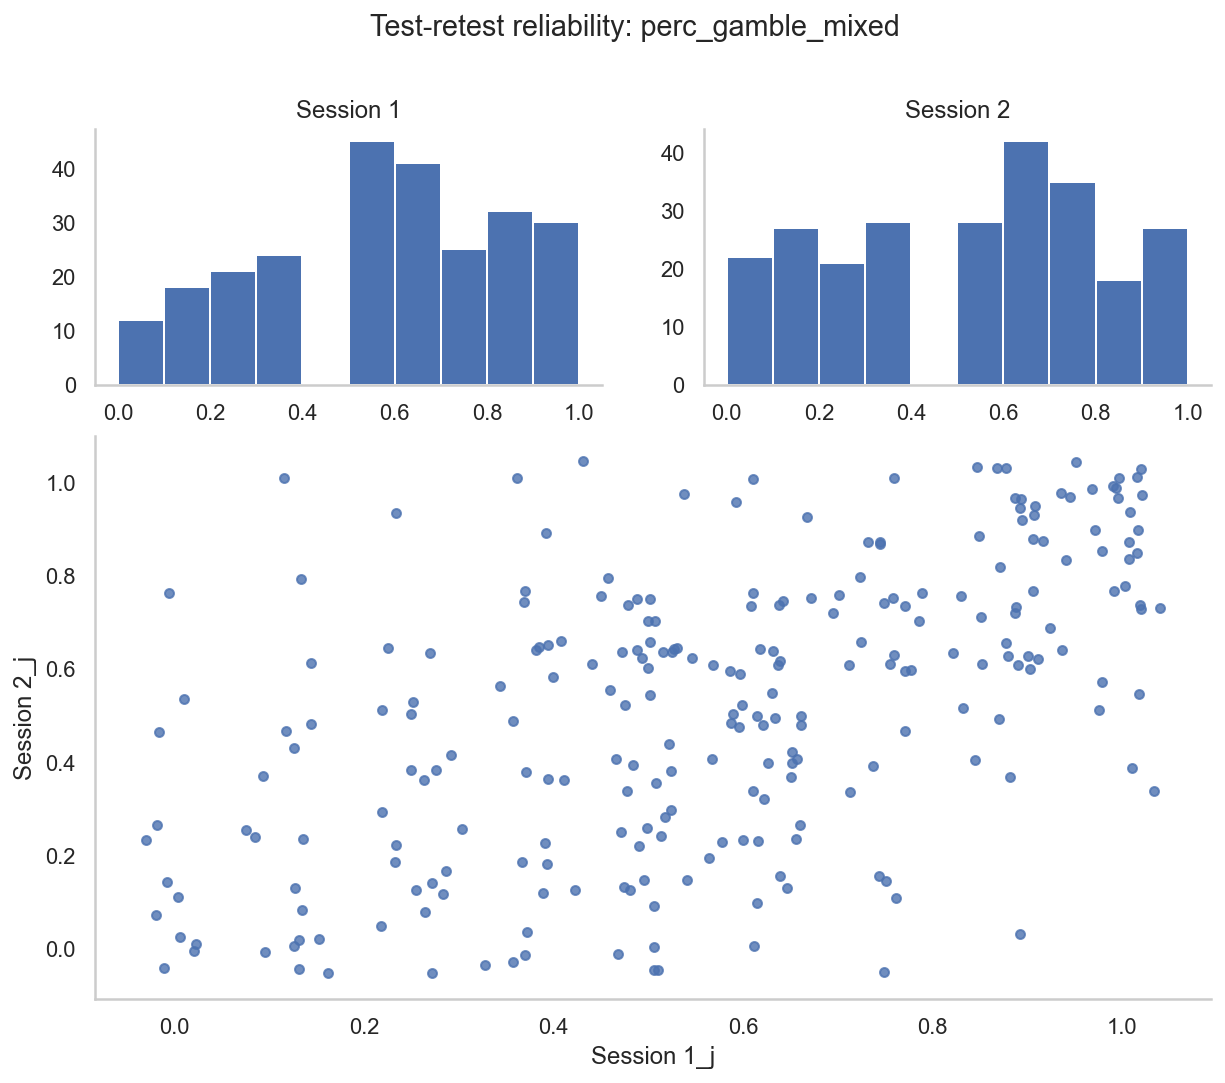

,type,ICC,F,df1,df2,p,lower bound,upper bound,description
0,ICC1,0.698,10.25,247.0,744.0,0.0,0.657,0.737,".70 (.66, .74)"
1,ICC2,0.699,10.59,247.0,741.0,0.0,0.657,0.738,".70 (.66, .74)"
2,ICC3,0.706,10.59,247.0,741.0,0.0,0.666,0.744,".71 (.67, .74)"
3,ICC1k,0.902,10.25,247.0,744.0,0.0,0.885,0.918,".90 (.88, .92)"
4,ICC2k,0.903,10.59,247.0,741.0,0.0,0.885,0.919,".90 (.88, .92)"
5,ICC3k,0.906,10.59,247.0,741.0,0.0,0.888,0.921,".91 (.89, .92)"


,type,variance,Percent
0,Participant,0.062,0.699
1,Session,0.001,0.010
2,Residual,0.026,0.291
3,Total,0.089,1.000


In [ ]:
iccs_mean_mixed = stats.analyze_reliability(bs, "perc_gamble_mixed", add_jitter = True)

ToDo: This was .5 (double check with all data).

This would still reduce an actual correlation of .8 to .65.

## Unbalanced chances
Note, however, that the expected advantage of choosing over gambling is not balanced accross sessions and conditions.

Discount rate is not 1 (values bigger than 1 mean that the probabilistic choices are discounted). The discount rate is not symmetric between win and loss.

From Rutledge (2014, SI): "Each trial of the smartphone-based experiment was randomly drawn from a list of 30 mixed trials, 60 gain trials, and 60 loss trials. The 30 mixed trials used 3 certain amounts in points (40, 55, 75) and 10 multipliers (0.2, 0.34, 0.5, 0.64, 0.77, 0.89, 1, 1.1, 1.35, 2). The 60 gain trials used 4 certain amounts (30, 35, 45, 55) and 15 multipliers (1.64, 1.7, 1.76, 1.82, 1.88, 1.94, 2, 2.06, 2.12, 2.18, 2.26, 2.4, 2.7, 3.2, 4). The 60 loss trials used the same amounts as the gain trials with 4 certain amounts (−30, −35, −45, −55) and the same 15 multipliers as used for loss trials. The maximum gain or loss for a single trial was 220 points."

I checked that this is indeed (roughly) how scores are generated in our data (with < 2 points deviations).  These deviations are too small to explain the choice advantages in some of the trials (> 50 points).

We could fix response noise over all sessions of one participant. Check out Pooseh's paper or ask Sarah or Nitzan.

,choice_advantage
trial_type,
loss,4.978565
mixed,-2.929014
win,-4.973561


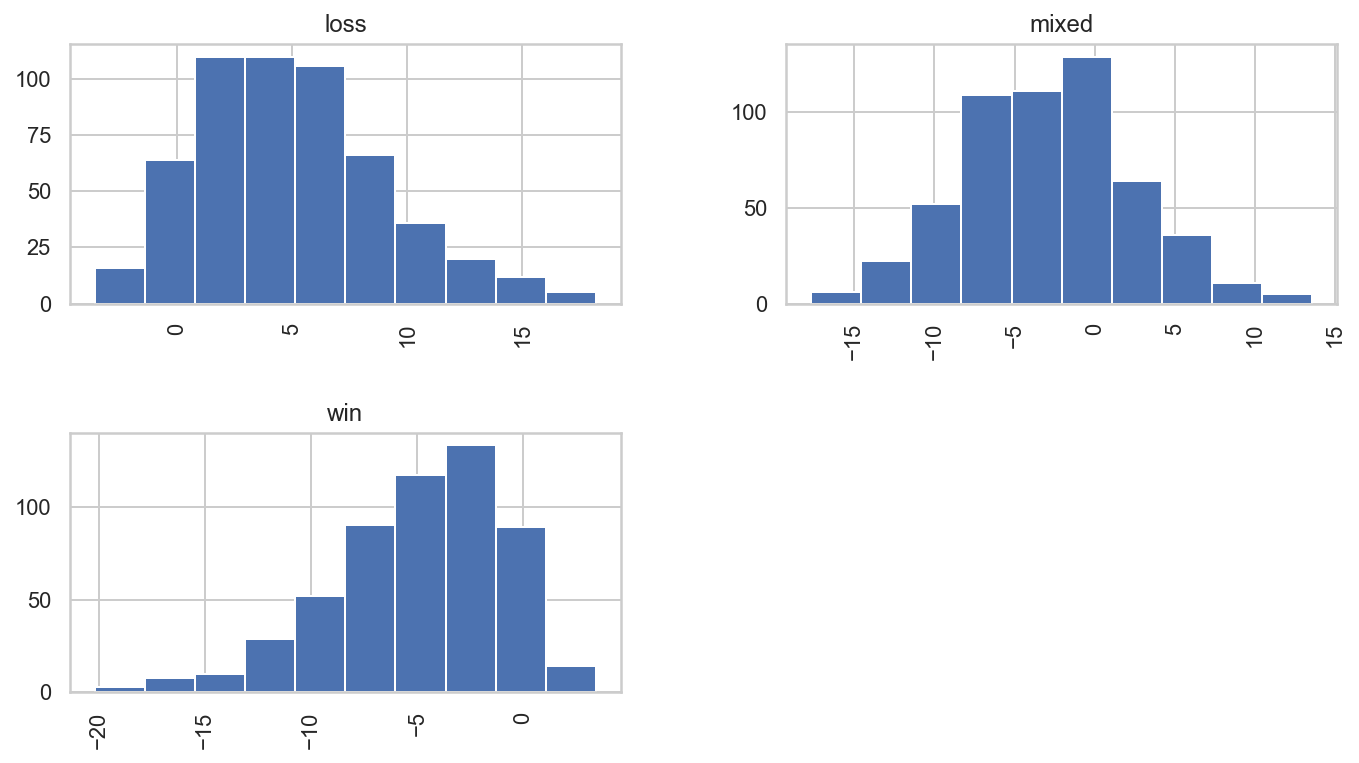

In [ ]:
df['choice_advantage'] = df.choiceamount.astype(int) - ((df.spinnerloseamount.astype(int) + df.spinnerwinamount.astype(int))/2)
choice_advantages = df.groupby(['participant','baseline_session','trial_type']).choice_advantage.mean().reset_index()
choice_advantages.hist(by = choice_advantages.trial_type)
choice_advantages.groupby('trial_type').mean()

Lorenz: As long as this noise is random, it should not be a big problem for correlating this with external variables. It could be more problematic for longitudinal.  This problem should only lower reliability (and our reliability was high).  Discussion: "Could even be higher".  For cross-sectional analyses we average over sessions, so this problem should also be negligable (it could however reduce effects).  In longitudinal analyses, the relative error might be more significant (here, we should probably control for this; e.g. by adding choice_advantage to the model).

Perhaps also compare pre-registered and adjusted method.

ToDo: Test correlation between percentage_gambled and choice_advantage.

In [ ]:
df.groupby('gambled').choice_advantage.mean()

gambled
False    3.263315
True    -4.392853
Name: choice_advantage, dtype: float64

# Trial level analysis (sessions modeled separately)
ToDo: This should be equivalent to mean method.  Perhaps try to find out why this is not always the case, here.

In [ ]:
example = df.query("baseline_session=='Session 1' and trial_type == 'win'")[['participant','baseline_session','trial_type','gambled']]
display(example)

,participant,baseline_session,trial_type,gambled
0,b001,Session 1,win,True
3,b001,Session 1,win,False
4,b001,Session 1,win,True
7,b001,Session 1,win,True
9,b001,Session 1,win,False
...,...,...,...,...
16304,m194,Session 1,win,True
16311,m194,Session 1,win,True
16314,m194,Session 1,win,True
16315,m194,Session 1,win,False


Predicting `is_gamble` with `1 + (1 | participant)` (random intercepts for participants) separately for each session.

## Advantages over mean method
- Data from other participants is included in the model.  
- Trial-level analysis allows to introduce extra explanatory variables (not done yet).

In [ ]:
def get_percentage_gamble_trial_sep(df):
    s1 = df.query('baseline_session == "Session 1"')
    s2 = df.query('baseline_session == "Session 2"')
    %R m1 = glmer(is_gamble ~ 1 + (1 | participant), data=s1, family=binomial, control = control, na.action = na.exclude) -i s1
    %R m2 = glmer(is_gamble ~ 1 + (1 | participant), data=s2, family=binomial, control = control, na.action = na.exclude) -i s2
    %R p1 <- ggpredict(m1, terms=c("participant[all]"), type="re",ci.lvl = NA) -o p1
    %R p2 <- ggpredict(m2, terms=c("participant[all]"), type="re",ci.lvl = NA) -o p2
    p1.columns = ['participant','predicted','baseline_session']
    p2.columns = ['participant','predicted','baseline_session']
    p1['baseline_session'] = 'Session 1'
    p2['baseline_session'] = 'Session 2'
    predicted = pd.concat([p1,p2], ignore_index = True)
    # This line is ugly (all it does is bring the data back to the gbe_baseline_index)
    predicted = pd.merge(predicted, df.groupby(['participant','baseline_session'])['gbe_baseline_index'].first().reset_index(), on = ['participant','baseline_session'], how='inner', validate='one_to_many').set_index('gbe_baseline_index')['predicted']
    return predicted



r_data = df[['gbe_baseline_index','participant','baseline_session','trial_index','is_even','trial_type','gambled']]
r_data['is_gamble'] = r_data.gambled.astype(int)
r_data['session'] = r_data.baseline_session.apply(lambda x: int(x.split(' ')[1]))

for trial_type in ['win','loss','mixed']:
    type_data = r_data.query('trial_type=="%s"'%trial_type)
    bs['perc_gamble_trial_separate_%s'%trial_type] = get_percentage_gamble_trial_sep(type_data)
    bs['perc_gamble_trial_separate_%s_even'%trial_type] = get_percentage_gamble_trial_sep(type_data.query('is_even==True'))
    bs['perc_gamble_trial_separate_%s_uneven'%trial_type] = get_percentage_gamble_trial_sep(type_data.query('is_even==False'))
#


## Internal consistency (split-half reliability)

### Percentage gamble win

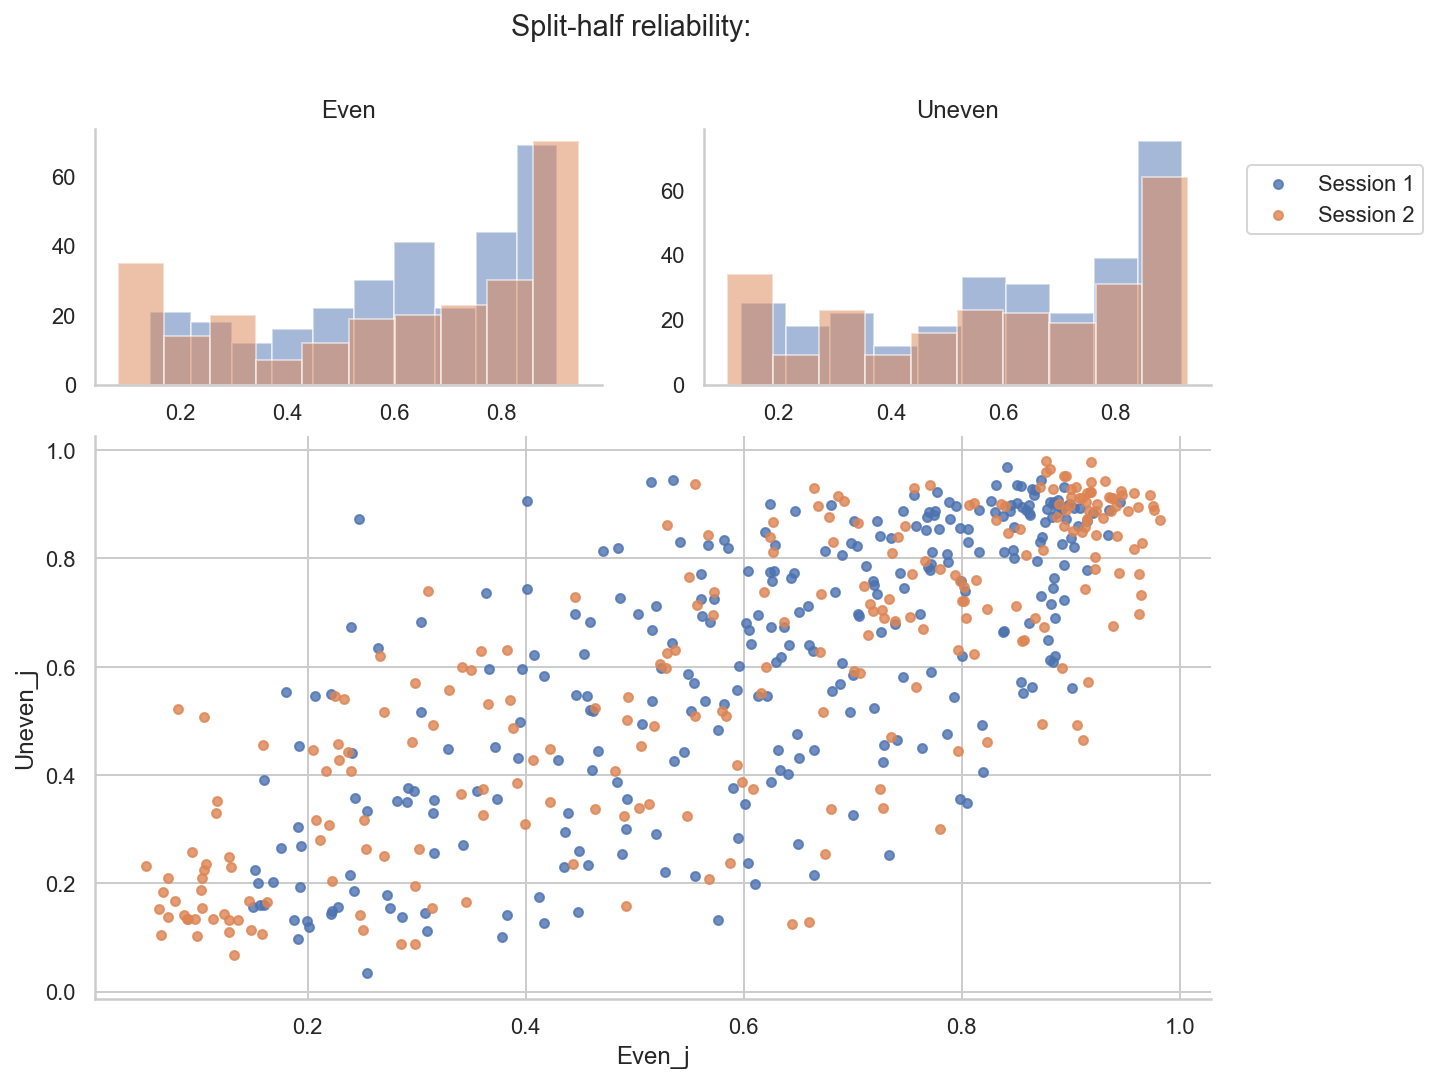

In [ ]:
sb_trial_sep_win = stats.analyze_split_half(bs, "perc_gamble_trial_separate_win_even", "perc_gamble_trial_separate_win_uneven", add_jitter = True)

### Percentage gambles loss

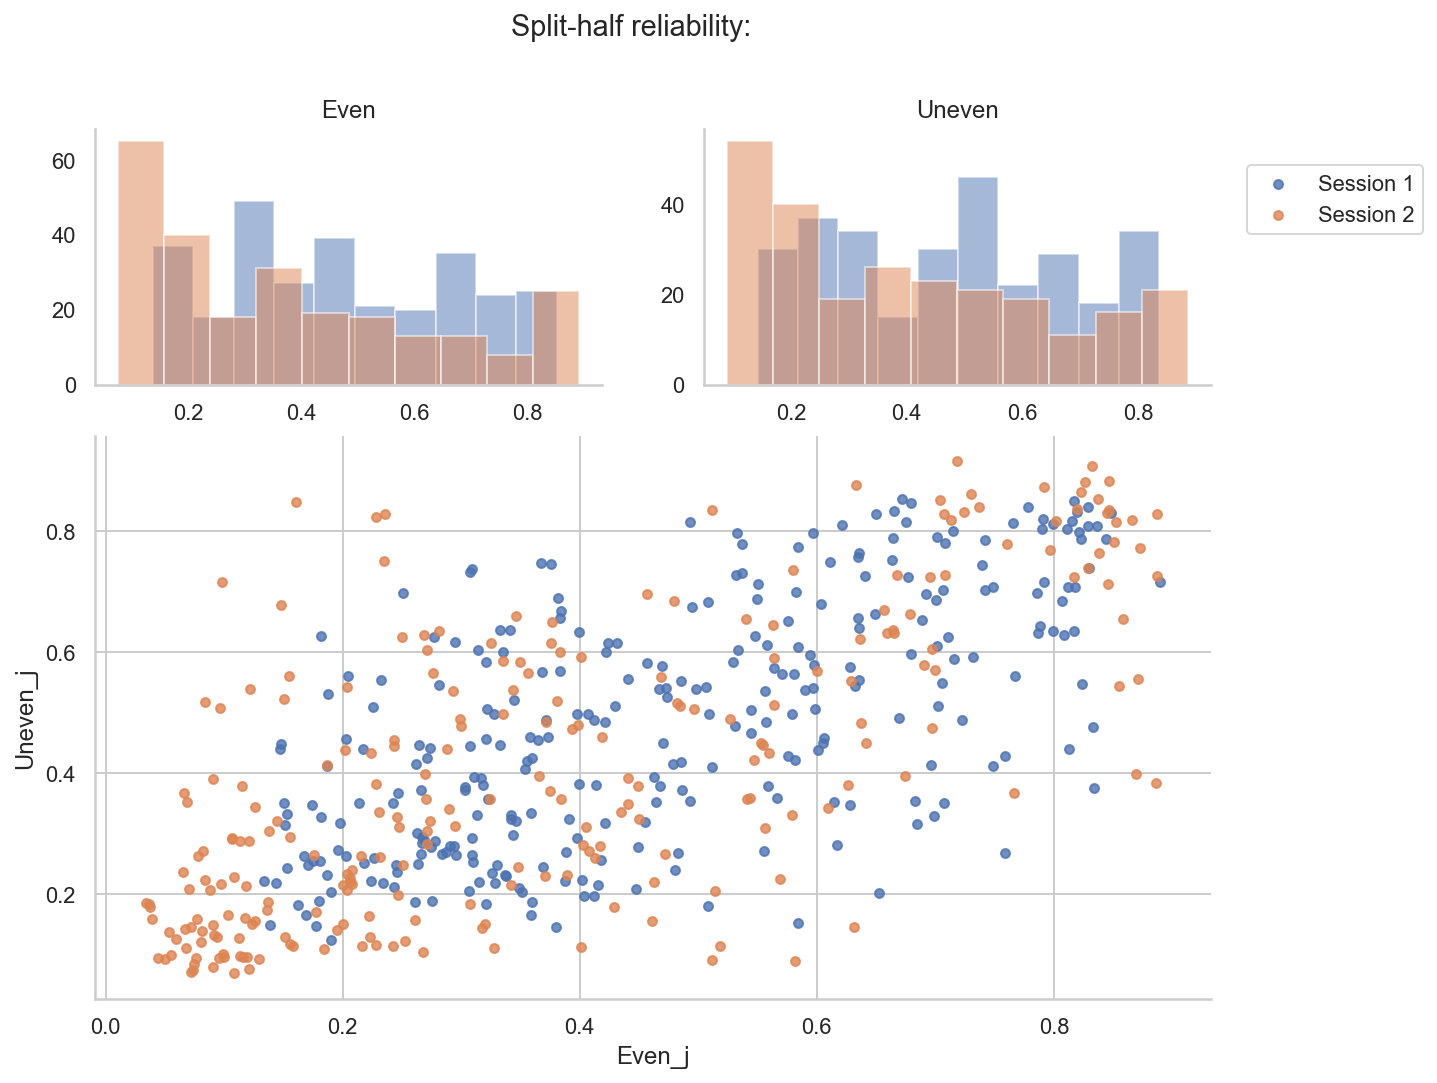

In [ ]:
sb_trial_sep_loss = stats.analyze_split_half(bs, "perc_gamble_trial_separate_loss_even", "perc_gamble_trial_separate_loss_uneven", add_jitter = True)

### Percentage gambles mixed

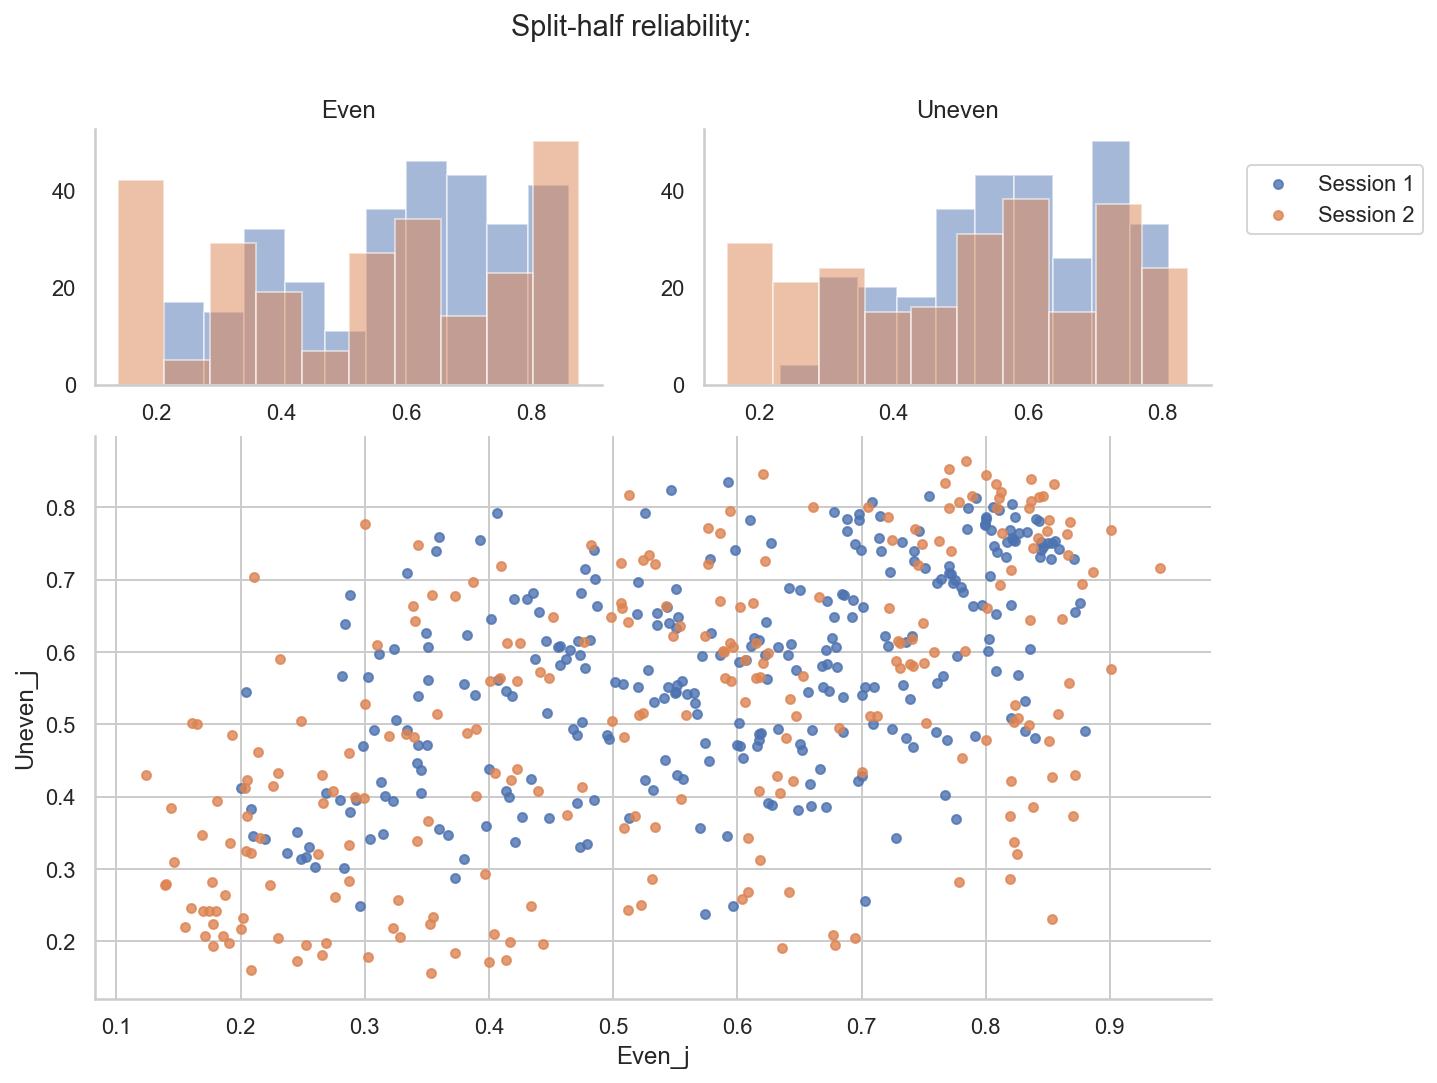

In [ ]:
sb_trial_sep_mixed = stats.analyze_split_half(bs, "perc_gamble_trial_separate_mixed_even", "perc_gamble_trial_separate_mixed_uneven", add_jitter = True)

## Test-retest reliability

### Percentage gambles win

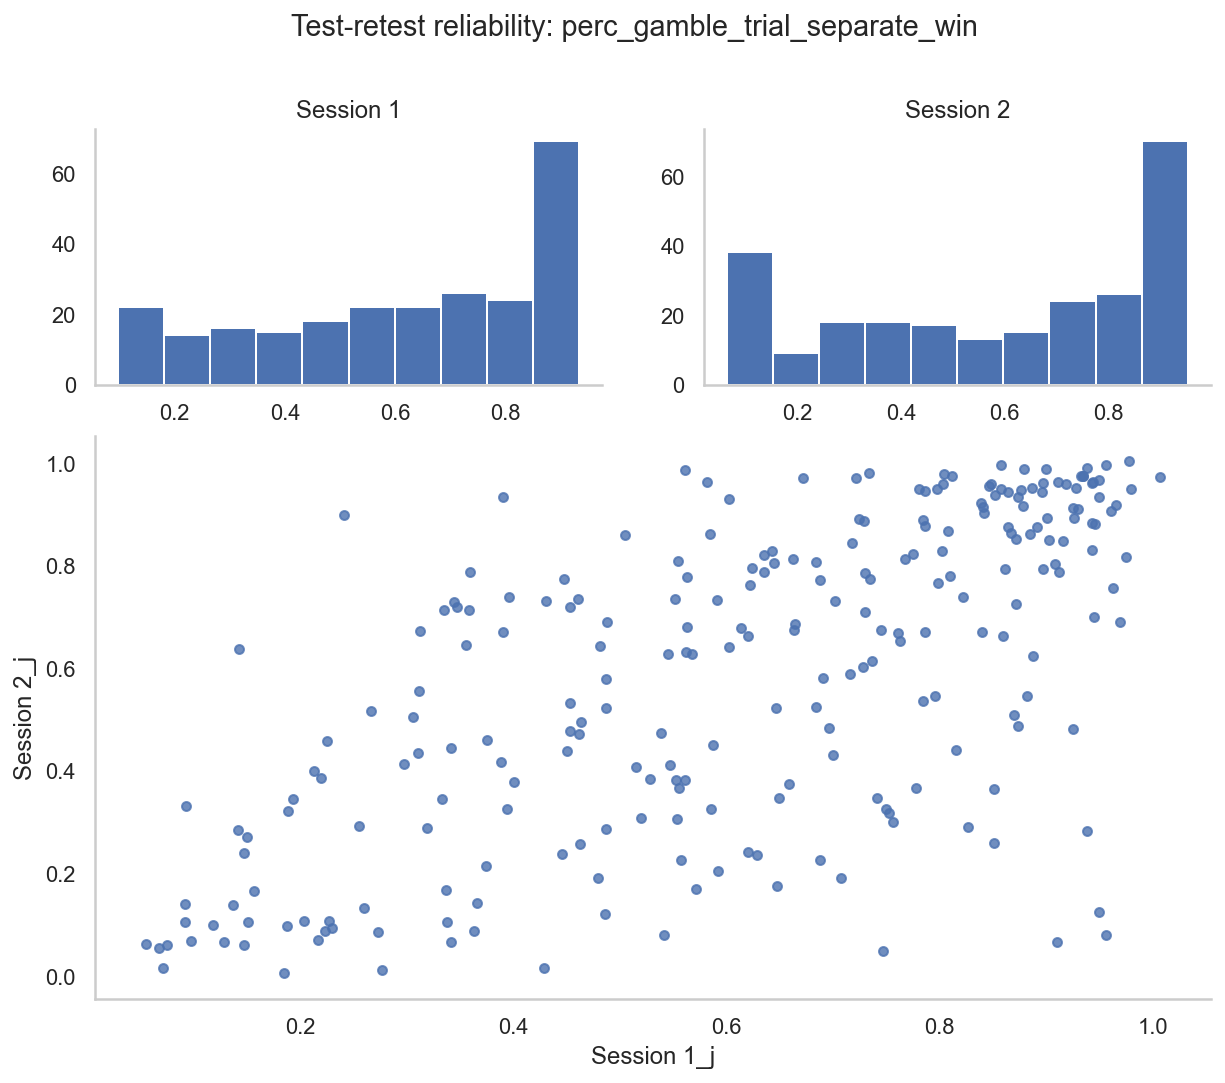

,type,ICC,F,df1,df2,p,lower bound,upper bound,description
0,ICC1,0.758,13.524,247.0,744.0,0.0,0.723,0.791,".76 (.72, .79)"
1,ICC2,0.758,13.657,247.0,741.0,0.0,0.723,0.791,".76 (.72, .79)"
2,ICC3,0.760,13.657,247.0,741.0,0.0,0.725,0.792,".76 (.73, .79)"
3,ICC1k,0.926,13.524,247.0,744.0,0.0,0.913,0.938,".93 (.91, .94)"
4,ICC2k,0.926,13.657,247.0,741.0,0.0,0.913,0.938,".93 (.91, .94)"
5,ICC3k,0.927,13.657,247.0,741.0,0.0,0.913,0.939,".93 (.91, .94)"


,type,variance,Percent
0,Participant,0.061,0.758
1,Session,0.000,0.002
2,Residual,0.019,0.240
3,Total,0.081,1.000


In [ ]:
iccs_trial_sep_win = stats.analyze_reliability(bs, "perc_gamble_trial_separate_win", add_jitter = True)

The task's reliability is moderate to good.

### Percentage gambles losses

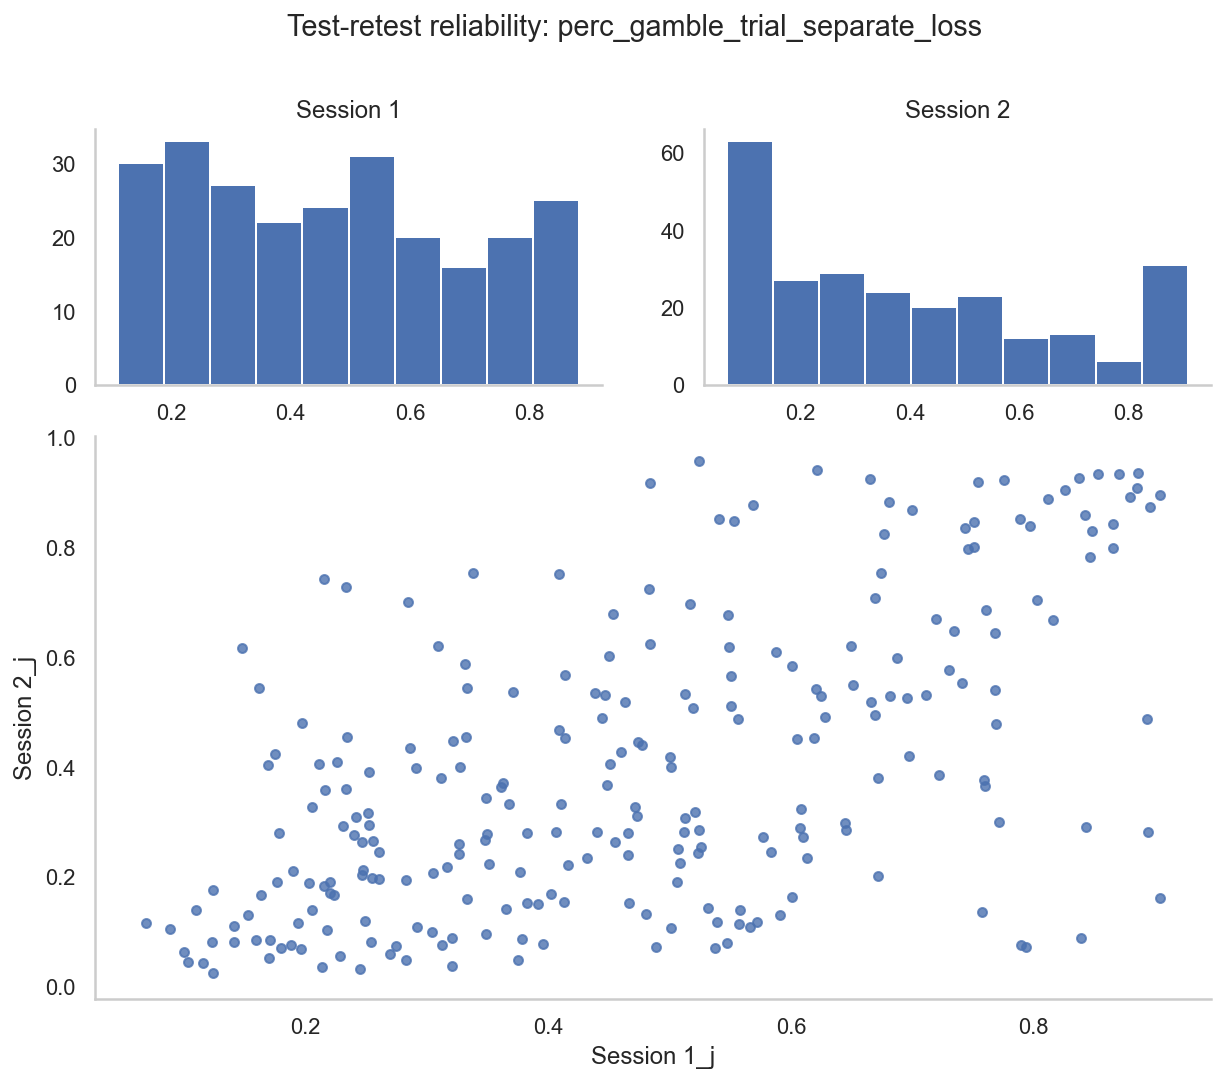

,type,ICC,F,df1,df2,p,lower bound,upper bound,description
0,ICC1,0.693,10.046,247.0,744.0,0.0,0.652,0.733,".69 (.65, .73)"
1,ICC2,0.696,11.197,247.0,741.0,0.0,0.644,0.742,".70 (.64, .74)"
2,ICC3,0.718,11.197,247.0,741.0,0.0,0.679,0.755,".72 (.68, .76)"
3,ICC1k,0.900,10.046,247.0,744.0,0.0,0.882,0.916,".90 (.88, .92)"
4,ICC2k,0.901,11.197,247.0,741.0,0.0,0.878,0.920,".90 (.88, .92)"
5,ICC3k,0.911,11.197,247.0,741.0,0.0,0.894,0.925,".91 (.89, .93)"


,type,variance,Percent
0,Participant,0.043,0.696
1,Session,0.002,0.031
2,Residual,0.017,0.273
3,Total,0.061,1.000


In [ ]:
iccs_trial_sep_loss = stats.analyze_reliability(bs, "perc_gamble_trial_separate_loss", add_jitter = True)

### Percentage gambles mixed

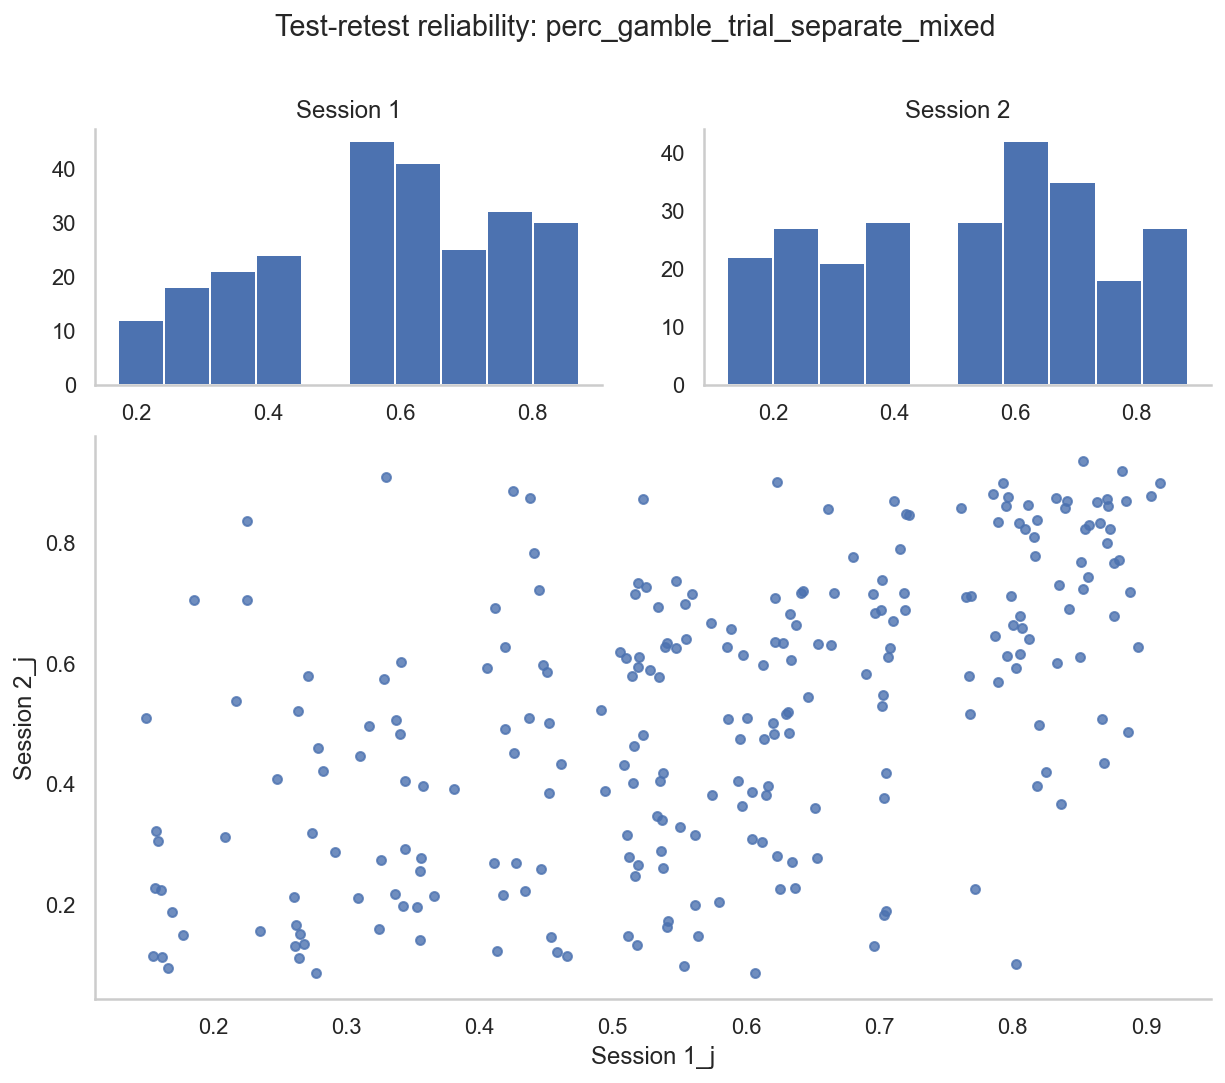

,type,ICC,F,df1,df2,p,lower bound,upper bound,description
0,ICC1,0.685,9.715,247.0,744.0,0.0,0.644,0.726,".69 (.64, .73)"
1,ICC2,0.687,10.417,247.0,741.0,0.0,0.640,0.730,".69 (.64, .73)"
2,ICC3,0.702,10.417,247.0,741.0,0.0,0.661,0.741,".70 (.66, .74)"
3,ICC1k,0.897,9.715,247.0,744.0,0.0,0.878,0.914,".90 (.88, .91)"
4,ICC2k,0.898,10.417,247.0,741.0,0.0,0.877,0.916,".90 (.88, .92)"
5,ICC3k,0.904,10.417,247.0,741.0,0.0,0.887,0.919,".90 (.89, .92)"


,type,variance,Percent
0,Participant,0.034,0.687
1,Session,0.001,0.021
2,Residual,0.015,0.292
3,Total,0.050,1.000


In [ ]:
iccs_trial_sep_mixed = stats.analyze_reliability(bs, "perc_gamble_trial_separate_mixed", add_jitter = True)

# Trial level analysis (sessions modeled jointly)

In [ ]:
example = df.query("trial_type == 'win'")[['participant','baseline_session','trial_type','gambled']].iloc[:-155]
display(example)

,participant,baseline_session,trial_type,gambled
0,b001,Session 1,win,True
3,b001,Session 1,win,False
4,b001,Session 1,win,True
7,b001,Session 1,win,True
9,b001,Session 1,win,False
...,...,...,...,...
15910,m187,Session 1,win,True
15916,m187,Session 1,win,True
15923,m187,Session 1,win,True
15924,m187,Session 1,win,True


Predicting `is_gamble` with `1 + (1 | participant / session)` (sessions nested in participants) with all win-trial data in the model.

## Advantages over mean method
- Data from other participants <i>and sessions</i> is included in the model.  
- Trial-level analysis allows to introduce extra explanatory variables (not done yet).

In [ ]:
def get_percentage_gamble_trial_joint(df):
    %R m = glmer(is_gamble ~ 1 + (1 | participant / session), data=df, family=binomial, control = control, na.action = na.exclude) -i df -o m
    %R p <- ggpredict(m, terms=c("participant[all]", "session"), type="re",ci.lvl = NA) -o p
    p.columns = ['participant','predicted','baseline_session']
    p.baseline_session.replace({'1':"Session 1",'2':"Session 2"}, inplace = True)
    predicted = pd.merge(p, df.groupby(['participant','baseline_session'])['gbe_baseline_index'].first().reset_index(), on = ['participant','baseline_session'], how='inner', validate='one_to_many').set_index('gbe_baseline_index')['predicted']
    return predicted, m


r_data = df[['gbe_baseline_index','participant','baseline_session','trial_index','is_even','trial_type','gambled']]
r_data['is_gamble'] = r_data.gambled.astype(int)
r_data['session'] = r_data.baseline_session.apply(lambda x: int(x.split(' ')[1]))
models = {}
for trial_type in ['win','loss','mixed']:
    type_data = r_data.query('trial_type=="%s"'%trial_type)
    bs['perc_gamble_trial_joint_%s'%trial_type], models['perc_gamble_trial_joint_%s'%trial_type] = get_percentage_gamble_trial_joint(type_data)
    bs['perc_gamble_trial_joint_%s_even'%trial_type], _ = get_percentage_gamble_trial_joint(type_data.query('is_even==True'))
    bs['perc_gamble_trial_joint_%s_uneven'%trial_type], _ = get_percentage_gamble_trial_joint(type_data.query('is_even==False'))

## Internal consistency (split-half reliability)

### Percentage gamble win

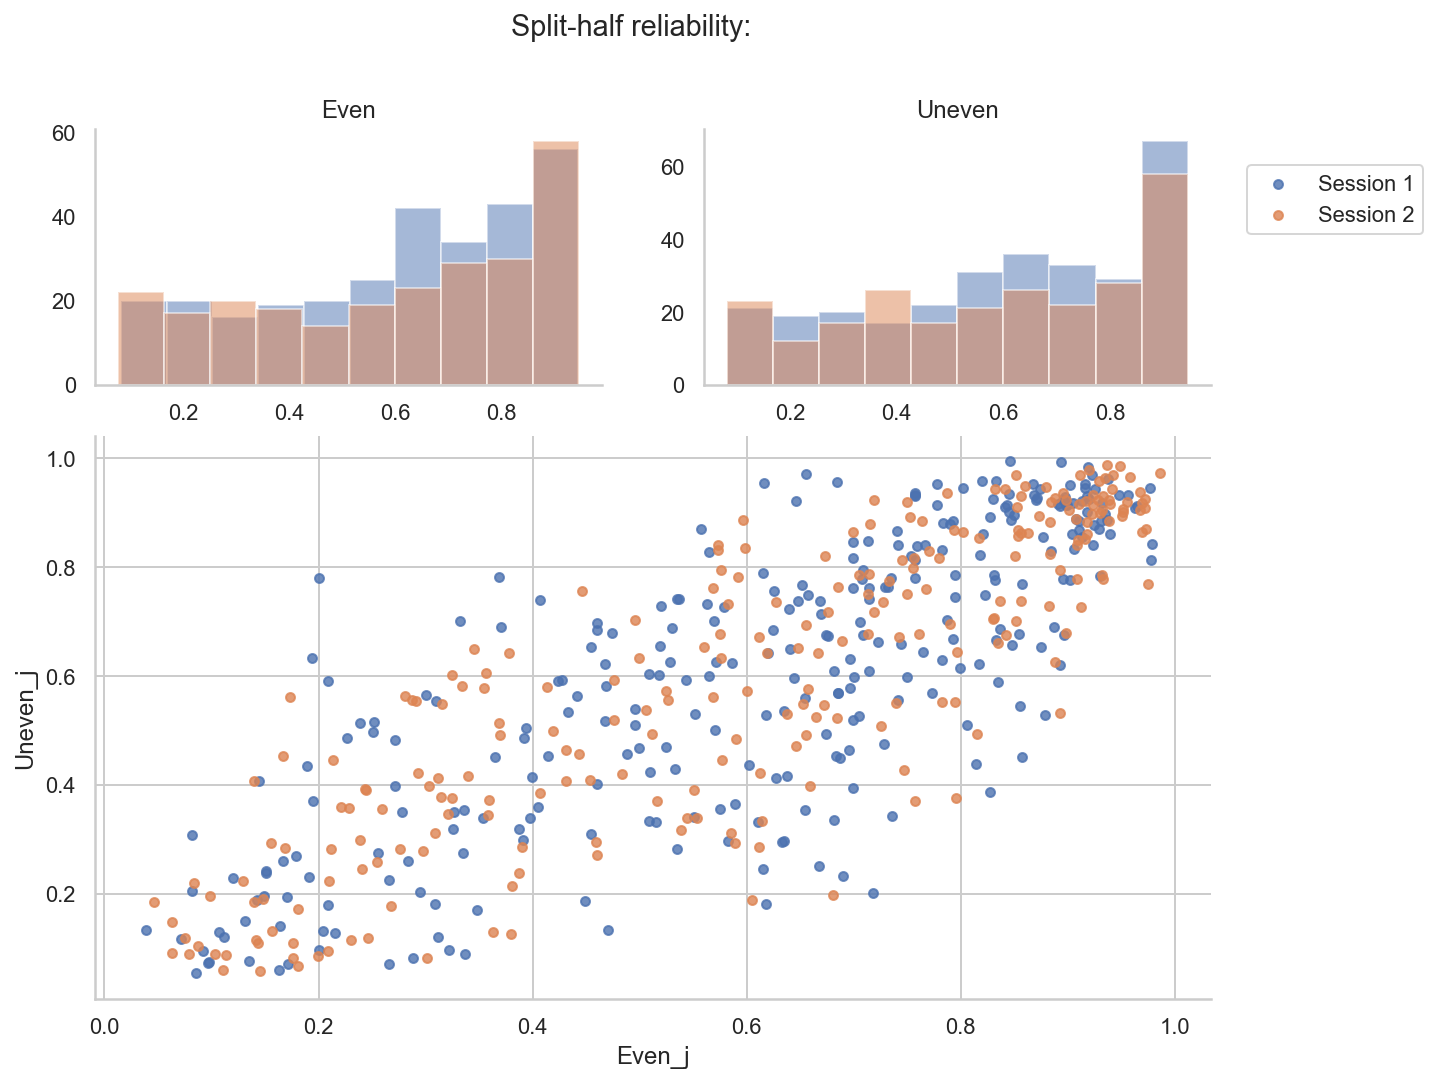

In [ ]:
sb_trial_joint_win = stats.analyze_split_half(bs, "perc_gamble_trial_joint_win_even", "perc_gamble_trial_joint_win_uneven", add_jitter = True)

### Percentage gambles loss

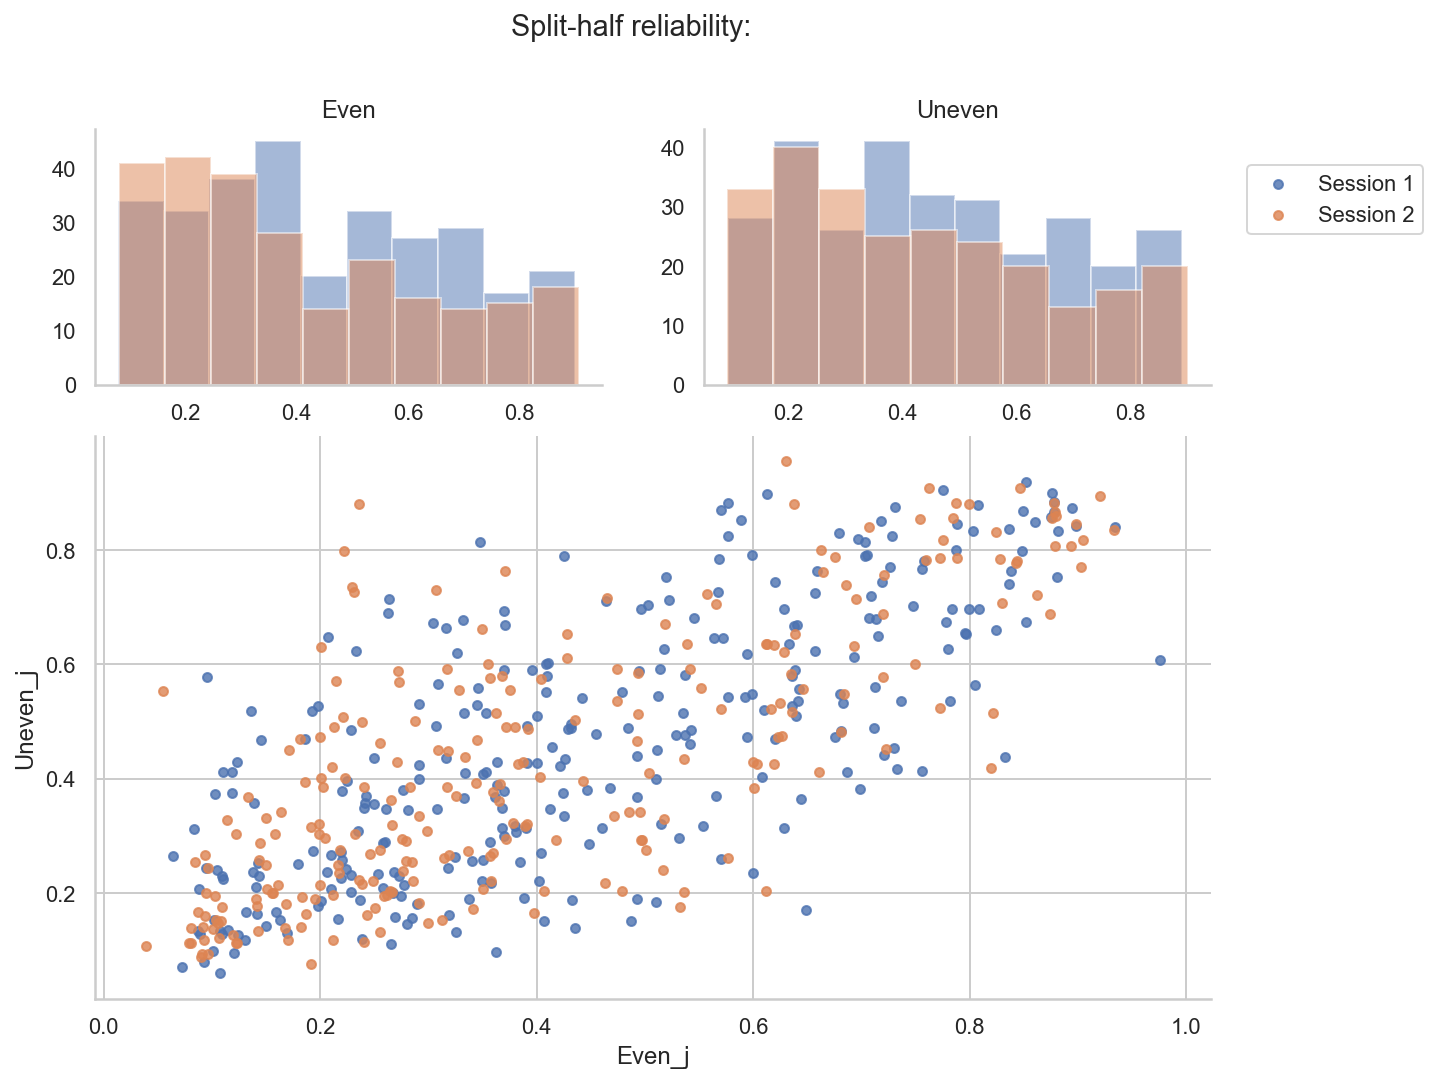

In [ ]:
sb_trial_joint_loss = stats.analyze_split_half(bs, "perc_gamble_trial_joint_loss_even", "perc_gamble_trial_joint_loss_uneven", add_jitter = True)

### Percentage gambles mixed

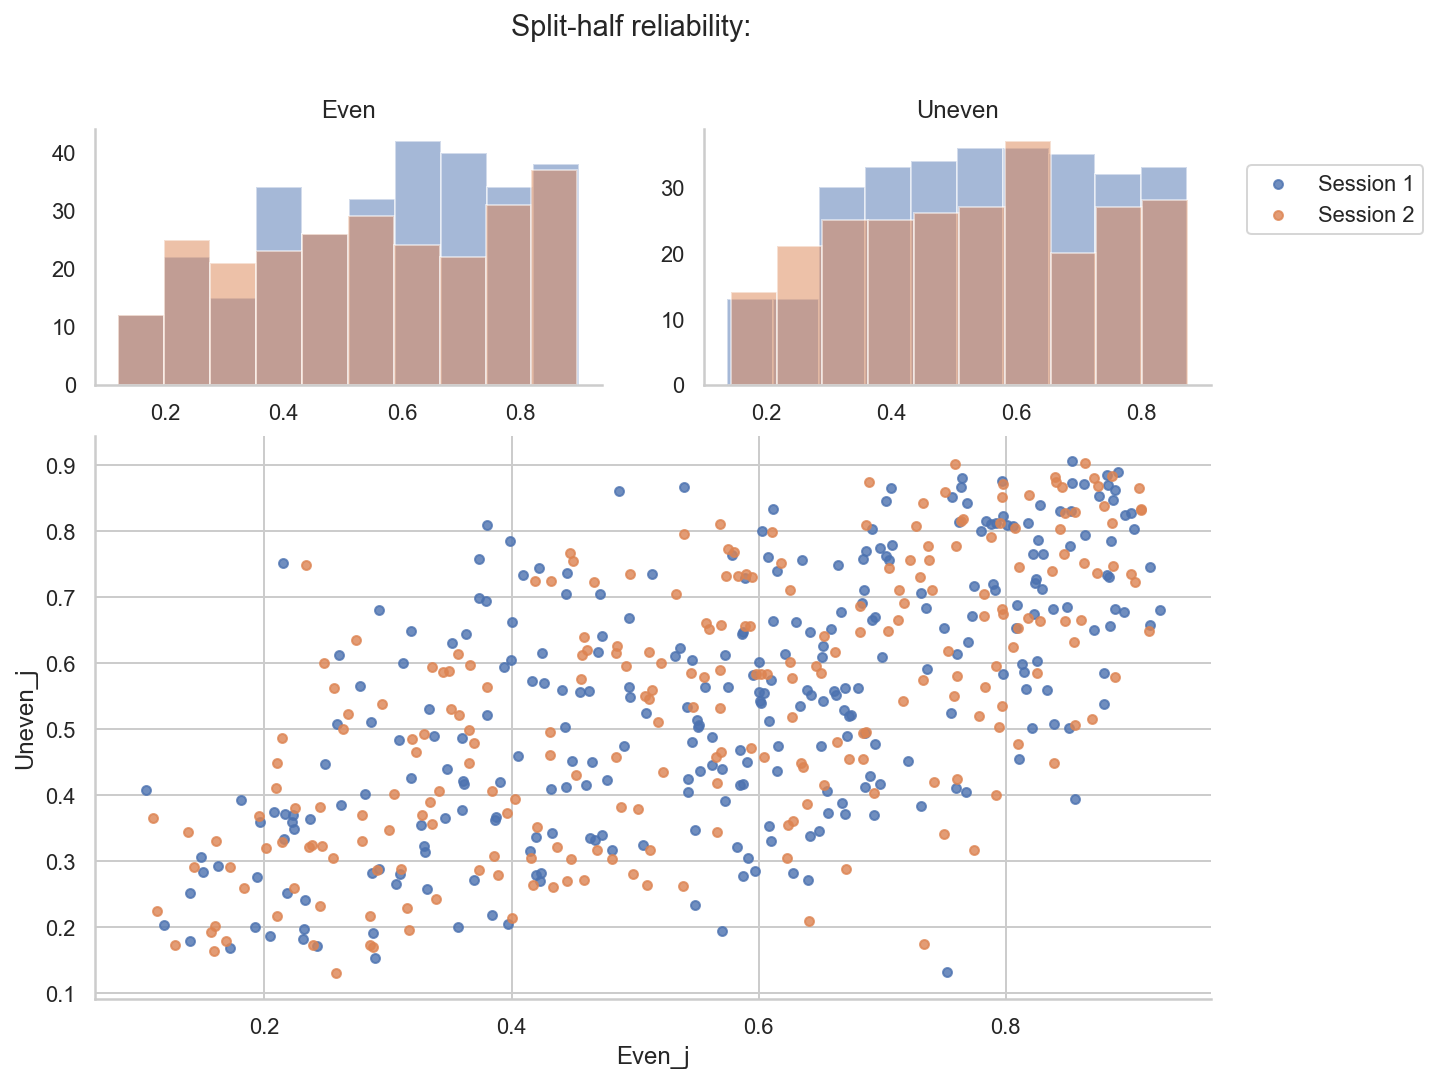

In [ ]:
sb_trial_joint_mixed = stats.analyze_split_half(bs, "perc_gamble_trial_joint_mixed_even", "perc_gamble_trial_joint_mixed_uneven", add_jitter = True)

## Test-retest reliability

### Percentage gambles win

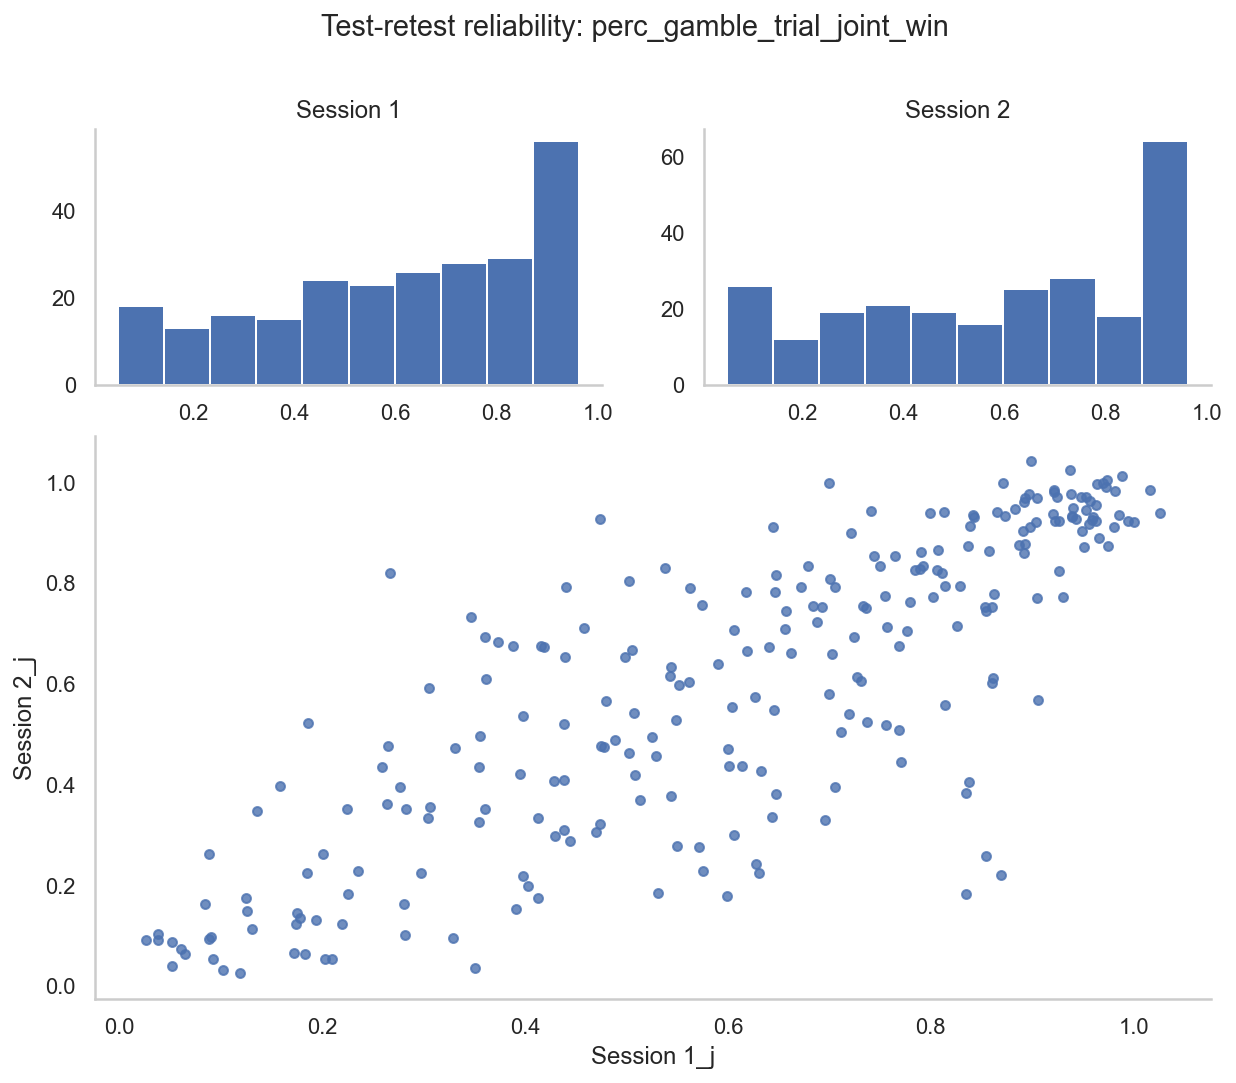

,type,ICC,F,df1,df2,p,lower bound,upper bound,description
0,ICC1,0.875,29.035,247.0,744.0,0.0,0.855,0.894,".88 (.85, .89)"
1,ICC2,0.875,29.187,247.0,741.0,0.0,0.855,0.894,".88 (.85, .89)"
2,ICC3,0.876,29.187,247.0,741.0,0.0,0.856,0.894,".88 (.86, .89)"
3,ICC1k,0.966,29.035,247.0,744.0,0.0,0.959,0.971,".97 (.96, .97)"
4,ICC2k,0.966,29.187,247.0,741.0,0.0,0.959,0.971,".97 (.96, .97)"
5,ICC3k,0.966,29.187,247.0,741.0,0.0,0.960,0.971,".97 (.96, .97)"


,type,variance,Percent
0,Participant,0.071,0.875
1,Session,0.000,0.001
2,Residual,0.010,0.124
3,Total,0.082,1.000


In [ ]:
iccs_trial_joint_win = stats.analyze_reliability(bs, "perc_gamble_trial_joint_win", add_jitter = True)

Reliability is good to excellent.

#### Based on model variances
Question: Why do we call session variance residual variance in this formula?

In [ ]:
def get_model_calculated_icc(m):
    %R require(insight) -i m
    %R var_sess <- get_variance_intercept(m)[1]
    %R var_pp <- get_variance_intercept(m)[2]
    %R icc <- var_pp / (var_pp+(var_sess)) -o icc -o var_sess -o var_pp
    # Note that what get_variance_intercept outputs as session variance, we call residual, here
    variances = pd.DataFrame({"type":["Participant","Session","Residual"],"variance":[var_pp[0],0,var_sess[0]]})
    variances["Percent"] = variances.variance/variances.variance.sum()
    variances = {'iccs':[None, variances]}
    return {'icc':icc[0],'variances':variances}
model_calculated_iccs = {}
model_calculated_iccs['perc_gamble_trial_joint_win'] = get_model_calculated_icc(models['perc_gamble_trial_joint_win'])
model_calculated_iccs['perc_gamble_trial_joint_win']['icc']

R[write to console]: Loading required package: insight



0.7867961161770932

### Percentage gambles losses

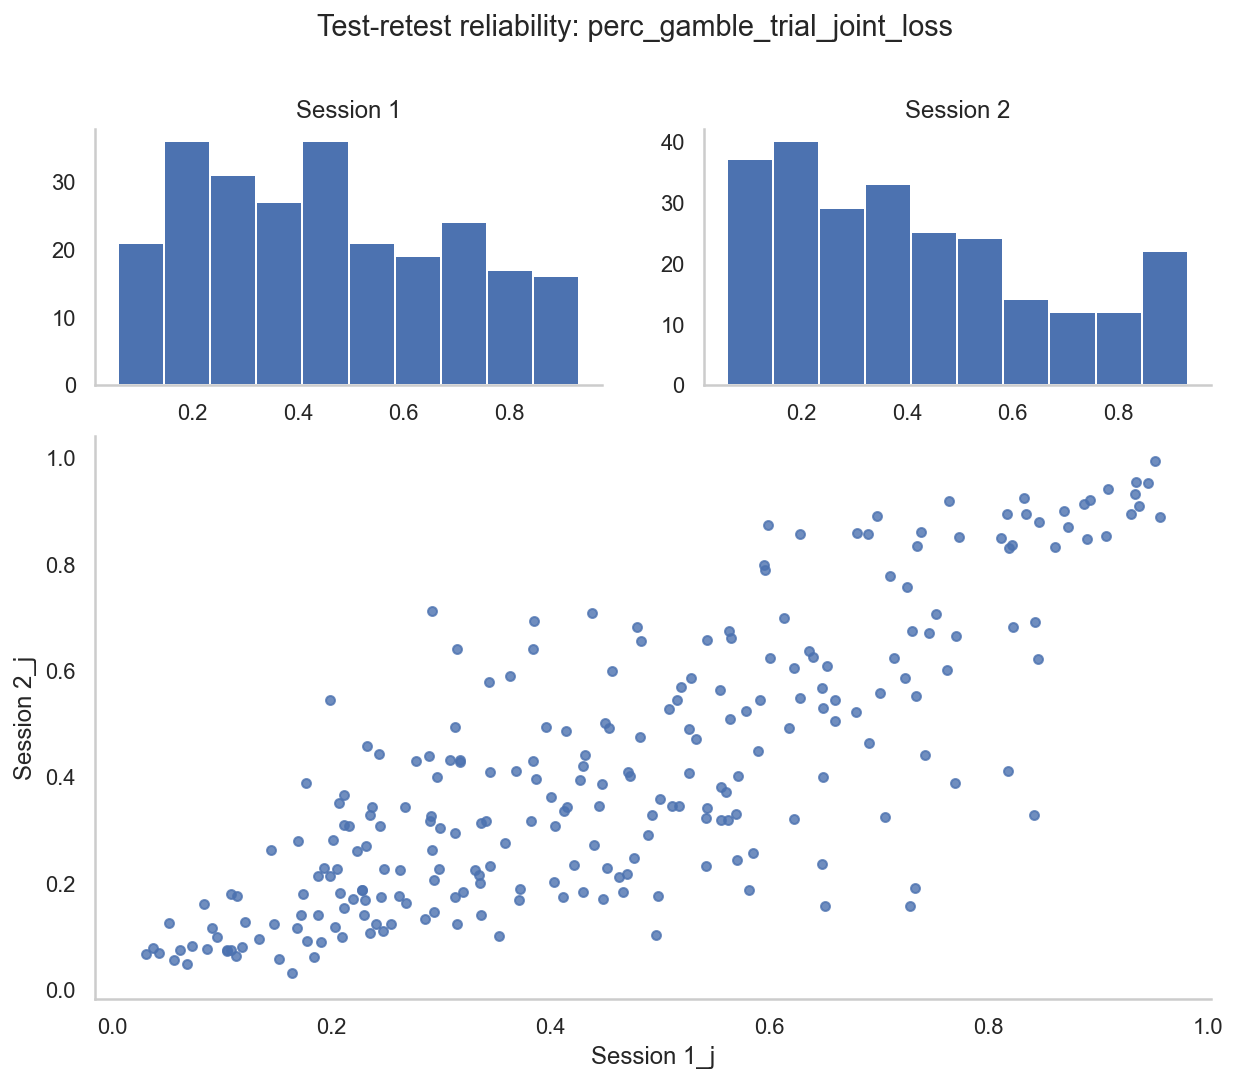

,type,ICC,F,df1,df2,p,lower bound,upper bound,description
0,ICC1,0.858,25.240,247.0,744.0,0.0,0.836,0.879,".86 (.84, .88)"
1,ICC2,0.859,27.005,247.0,741.0,0.0,0.833,0.881,".86 (.83, .88)"
2,ICC3,0.867,27.005,247.0,741.0,0.0,0.845,0.886,".87 (.85, .89)"
3,ICC1k,0.960,25.240,247.0,744.0,0.0,0.953,0.967,".96 (.95, .97)"
4,ICC2k,0.960,27.005,247.0,741.0,0.0,0.952,0.967,".96 (.95, .97)"
5,ICC3k,0.963,27.005,247.0,741.0,0.0,0.956,0.969,".96 (.96, .97)"


,type,variance,Percent
0,Participant,0.053,0.859
1,Session,0.001,0.009
2,Residual,0.008,0.132
3,Total,0.062,1.000


In [ ]:
iccs_trial_joint_loss = stats.analyze_reliability(bs, "perc_gamble_trial_joint_loss", add_jitter = True)

#### Based on model variances

In [ ]:
model_calculated_iccs['perc_gamble_trial_joint_loss'] = get_model_calculated_icc(models['perc_gamble_trial_joint_loss'])
model_calculated_iccs['perc_gamble_trial_joint_loss']['icc']

0.7349747706976745

### Percentage gambles mixed

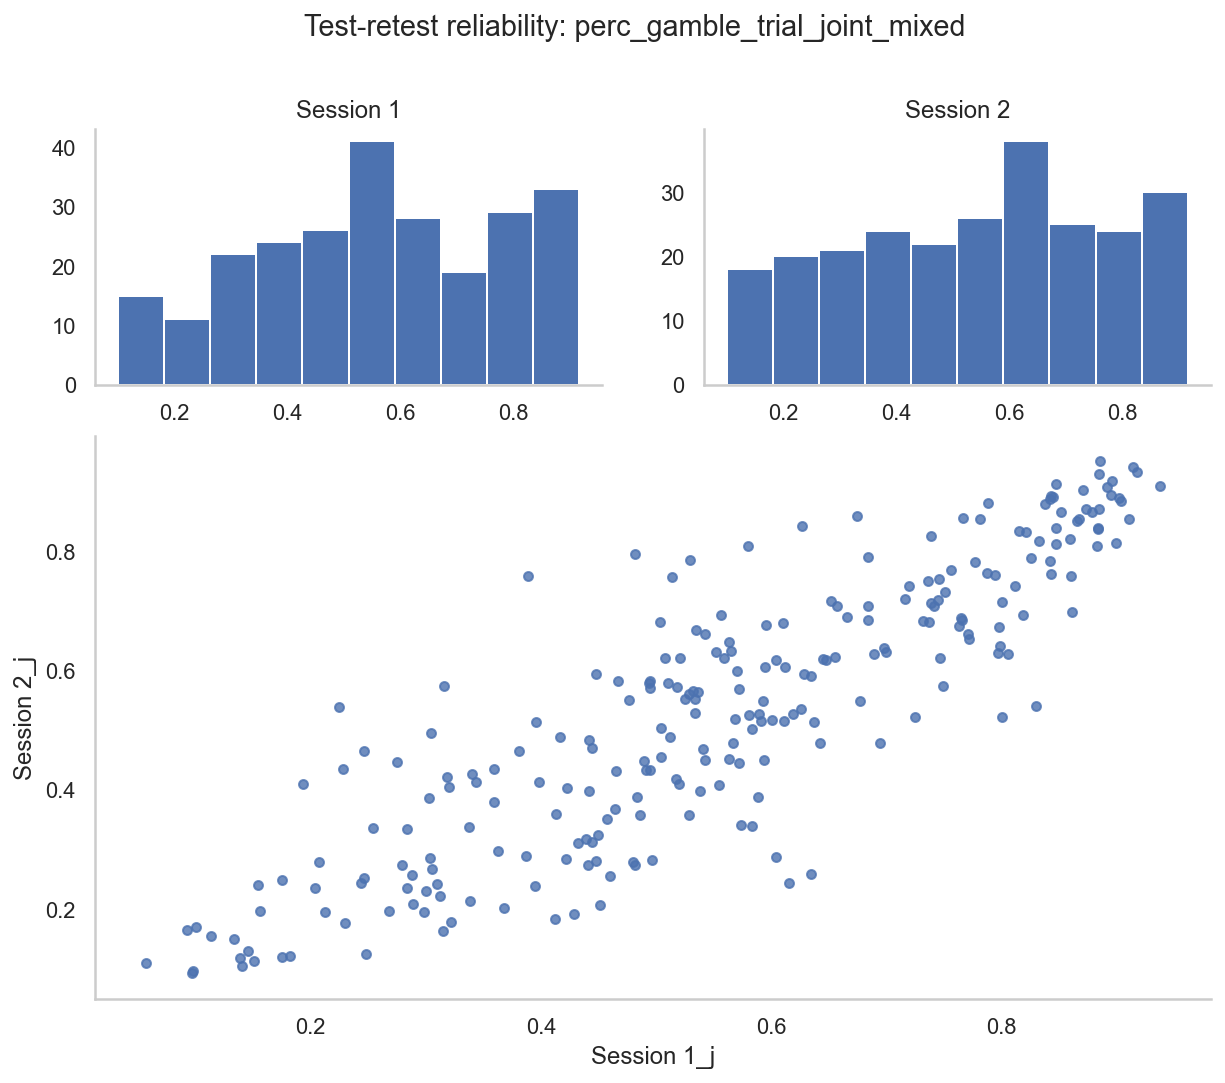

,type,ICC,F,df1,df2,p,lower bound,upper bound,description
0,ICC1,0.914,43.248,247.0,744.0,0.0,0.899,0.927,".91 (.90, .93)"
1,ICC2,0.914,44.562,247.0,741.0,0.0,0.899,0.927,".91 (.90, .93)"
2,ICC3,0.916,44.562,247.0,741.0,0.0,0.902,0.929,".92 (.90, .93)"
3,ICC1k,0.977,43.248,247.0,744.0,0.0,0.973,0.981,".98 (.97, .98)"
4,ICC2k,0.977,44.562,247.0,741.0,0.0,0.973,0.981,".98 (.97, .98)"
5,ICC3k,0.978,44.562,247.0,741.0,0.0,0.973,0.981,".98 (.97, .98)"


,type,variance,Percent
0,Participant,0.047,0.914
1,Session,0.000,0.003
2,Residual,0.004,0.084
3,Total,0.051,1.000


In [ ]:
iccs_trial_joint_mixed = stats.analyze_reliability(bs, "perc_gamble_trial_joint_mixed", add_jitter = True)

#### Based on model variances

In [ ]:
model_calculated_iccs['perc_gamble_trial_joint_mixed'] = get_model_calculated_icc(models['perc_gamble_trial_joint_mixed'])
model_calculated_iccs['perc_gamble_trial_joint_mixed']['icc']

0.7861487175988547

# Comparison of methods

## Internal consistency

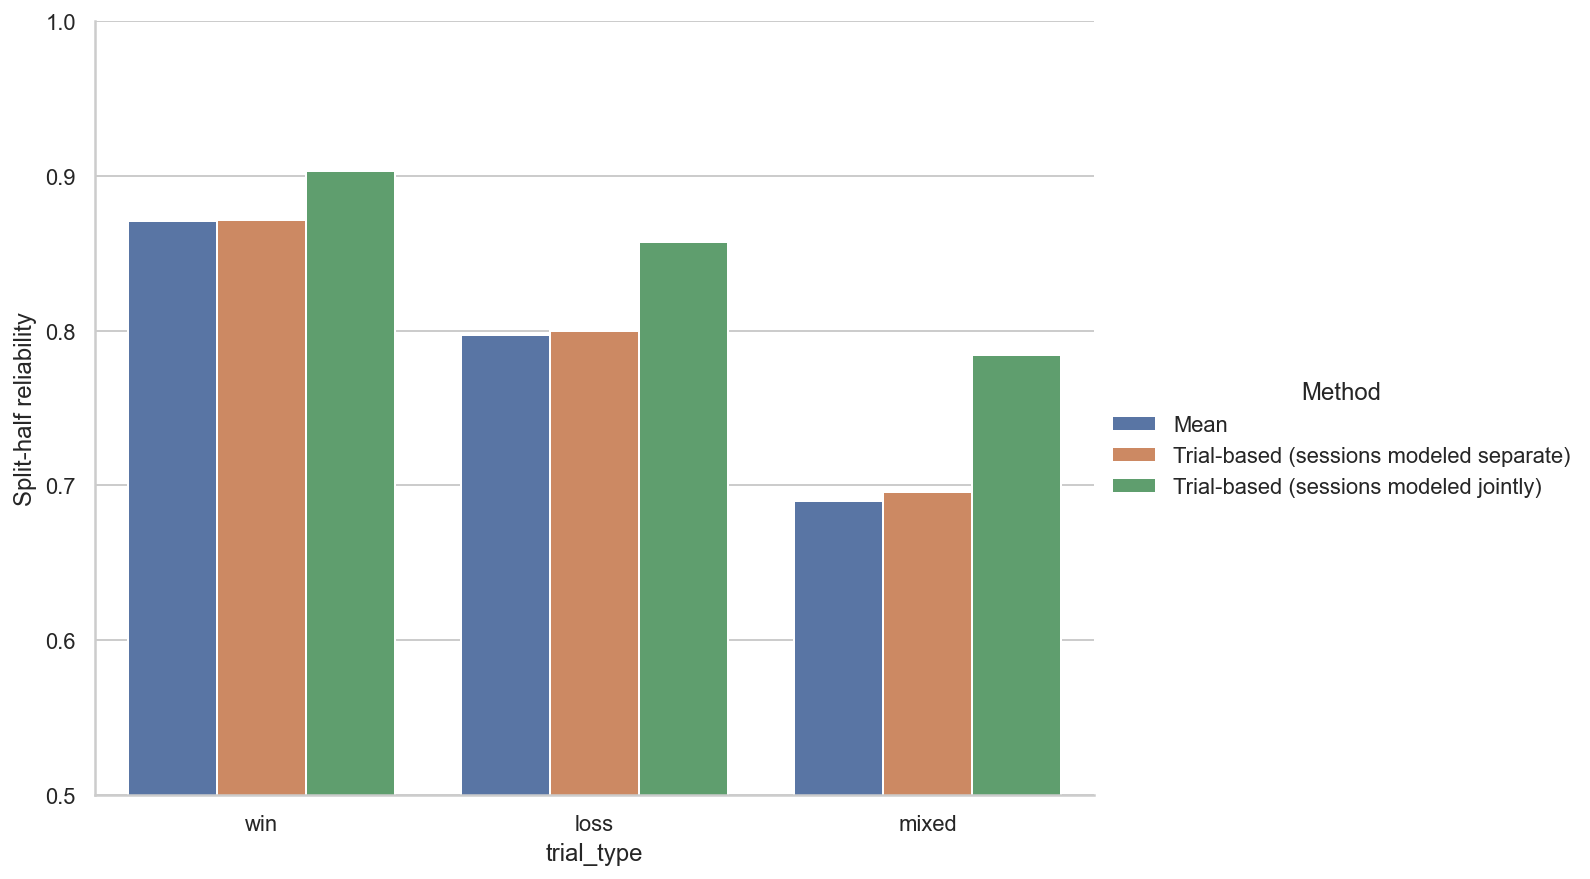

In [ ]:
df = pd.DataFrame({})
df.loc['mean_win_1','sb'] = sb_mean_win['spearman_browns'][0]
df.loc['mean_win_2','sb'] = sb_mean_win['spearman_browns'][1]
df.loc['mean_loss_1','sb'] = sb_mean_loss['spearman_browns'][0]
df.loc['mean_loss_2','sb'] = sb_mean_loss['spearman_browns'][1]
df.loc['mean_mixed_1','sb'] = sb_mean_mixed['spearman_browns'][0]
df.loc['mean_mixed_2','sb'] = sb_mean_mixed['spearman_browns'][1]
df.loc['trial_sep_win_1','sb'] =   sb_trial_sep_win['spearman_browns'][0]
df.loc['trial_sep_win_2','sb'] =   sb_trial_sep_win['spearman_browns'][1]
df.loc['trial_sep_loss_1','sb'] =  sb_trial_sep_loss['spearman_browns'][0]
df.loc['trial_sep_loss_2','sb'] =  sb_trial_sep_loss['spearman_browns'][1]
df.loc['trial_sep_mixed_1','sb'] = sb_trial_sep_mixed['spearman_browns'][0]
df.loc['trial_sep_mixed_2','sb'] = sb_trial_sep_mixed['spearman_browns'][1]
df.loc['trial_joint_win_1','sb'] =   sb_trial_joint_win['spearman_browns'][0]
df.loc['trial_joint_win_2','sb'] =   sb_trial_joint_win['spearman_browns'][1]
df.loc['trial_joint_loss_1','sb'] =  sb_trial_joint_loss['spearman_browns'][0]
df.loc['trial_joint_loss_2','sb'] =  sb_trial_joint_loss['spearman_browns'][1]
df.loc['trial_joint_mixed_1','sb'] = sb_trial_joint_mixed['spearman_browns'][0]
df.loc['trial_joint_mixed_2','sb'] = sb_trial_joint_mixed['spearman_browns'][1]

df = df.reset_index()
df.rename(columns = {'index':'category','sb':'Split-half reliability'}, inplace = True)
df['session'] = df.category.apply(lambda x: x.split('_')[-1])
df['trial_type'] = df.category.apply(lambda x: x.split('_')[-2])
df['Method'] = df.category.apply(lambda x: '_'.join(x.split('_')[:-2]))
df.Method.replace({'mean':'Mean',
                  'trial_sep':'Trial-based (sessions modeled separate)',
                  'trial_joint':'Trial-based (sessions modeled jointly)'
                  }, inplace = True)


g = sns.catplot(x = "trial_type",       # x variable name
            y = "Split-half reliability",       # y variable name
            hue = "Method",  # group variable name
            data = df,     # dataframe to plot
            kind = "bar",
           ci = None,
            height=6, aspect=1.3)
g.set(ylim=(.5, 1))
ax = g.axes[0][0]
#ax.axhline(.8, color = 'black')

Questions:
- Do the improved split-half reliabilities indicate that the joint method indeed decreases measurement error?

## Test-retest reliability

In [ ]:
df = pd.DataFrame({})
icc = "ICC2"#'ICC1k'
df.loc['mean_win','sb'] =                 iccs_mean_win['iccs'][0].query('type=="%s"'%icc)['ICC'].iloc[0]
df.loc['mean_loss','sb'] =               iccs_mean_loss['iccs'][0].query('type=="%s"'%icc)['ICC'].iloc[0]
df.loc['mean_mixed','sb'] =             iccs_mean_mixed['iccs'][0].query('type=="%s"'%icc)['ICC'].iloc[0]
df.loc['trial_sep_win','sb'] =       iccs_trial_sep_win['iccs'][0].query('type=="%s"'%icc)['ICC'].iloc[0]
df.loc['trial_sep_loss','sb'] =      iccs_trial_sep_loss['iccs'][0].query('type=="%s"'%icc)['ICC'].iloc[0]
df.loc['trial_sep_mixed','sb'] =     iccs_trial_sep_mixed['iccs'][0].query('type=="%s"'%icc)['ICC'].iloc[0]
df.loc['trial_joint_win','sb'] =   iccs_trial_joint_win['iccs'][0].query('type=="%s"'%icc)['ICC'].iloc[0]
df.loc['trial_joint_loss','sb'] =  iccs_trial_joint_loss['iccs'][0].query('type=="%s"'%icc)['ICC'].iloc[0]
df.loc['trial_joint_mixed','sb'] = iccs_trial_joint_mixed['iccs'][0].query('type=="%s"'%icc)['ICC'].iloc[0]

df.loc['model_calc_win','sb'] =   model_calculated_iccs['perc_gamble_trial_joint_win']
df.loc['model_calc_loss','sb'] =  model_calculated_iccs['perc_gamble_trial_joint_loss']
df.loc['model_calc_mixed','sb'] = model_calculated_iccs['perc_gamble_trial_joint_mixed']

df = df.reset_index()
df.rename(columns = {'index':'category','sb':"Test-retest reliability (%s)"%icc}, inplace = True)
df['trial_type'] = df.category.apply(lambda x: x.split('_')[-1])
df['Method'] = df.category.apply(lambda x: '_'.join(x.split('_')[:-1]))
df.Method.replace({'mean':'Mean',
                  'trial_sep':'Trial-based (sessions modeled separate)',
                  'trial_joint':'Trial-based (sessions modeled jointly)',
                  'model_calc':'Trial-based (model calculated)'
                  }, inplace = True)

g = sns.catplot(x = "trial_type",       # x variable name
            y = "Test-retest reliability (%s)"%icc,       # y variable name
            hue = "Method",  # group variable name
            data = df,     # dataframe to plot
            kind = "bar",
           ci = None,
            height=6, aspect=1.3)
g.set(ylim=(.5, 1))
ax = g.axes[0][0]
#ax.axhline(.8, color = 'black')

ValueError: Must have equal len keys and value when setting with an iterable

For loss and mixed trials, the trial-based models perform better than mean methods.  For win trials, they perform equally well.  Note, however, that we have to introduced any additional explanatory variables into the trial-based model.  For example, the expected reward of gambling vs. chosing the certain option differs in different trials.  Introducing this into the model should further reduce error and thus increase the task's reliability.

Questions:
- Is the joint model method mathematically similar to ICC(k)s?
  - Perhaps not, this method even improves upon ICC(k)s.
- Is the joint method reducing measurement error or predictable temporal variation?
- Make variance component plots

ToDo:
- Implement Vanessa Brown's Method (This should slightly reduce ICC's)
  - Add this as extra bar in the plot
- Explain Stein's paradox:
  - Usually, the average of past events is the best estimator of future events.
  - According to Stein's paradox, shrinking individual averages (e.g. session averages) towards grand averages (e.g., participant/sample averages) actually improves the prediction based on individual averages.
- Show how the different variances components of the ICCs change between the different methods
- Run unified model with all trial types
  - Perhaps as extra nesting 
- Add error-bars

# Variance components

In [ ]:
def var_comp_plot(title, results):
    perc_variance = []
    for r in results.items():
        perc_variance.append(r[1]['iccs'][1].set_index('type').T[['Participant','Session','Residual']].loc['Percent'])
    df = pd.DataFrame(perc_variance)
    df.index = results.keys()
    ax = df.plot(kind = 'bar', stacked = True)
    ax.grid(False)
    sns.despine()
    ax.set_title(title)
    ax.legend(bbox_to_anchor=(1.12, 1.05))
    plt.xticks(rotation=0)

## Percentage gamble win

In [ ]:
var_comp_plot("Percentage Gambles (win)",{'Mean':iccs_mean_win,'Separate models':iccs_trial_sep_win,'Joint models':iccs_trial_joint_win,'Model Calculated':model_calculated_iccs['perc_gamble_trial_joint_win']['variances']})

NameError: name 'iccs_mean_win' is not defined

## Percentage gamble loss

In [ ]:
var_comp_plot("Percentage Gambles (loss)",{'Mean':iccs_mean_loss,'Separate models':iccs_trial_sep_loss,'Joint models':iccs_trial_joint_loss,'Model Calculated':model_calculated_iccs['perc_gamble_trial_joint_loss']['variances']})

NameError: name 'iccs_mean_loss' is not defined

## Percentage gamble mixed

In [ ]:
var_comp_plot("Percentage Gambles (mixed)",{'Mean':iccs_mean_mixed,'Separate models':iccs_trial_sep_mixed,'Joint models':iccs_trial_joint_mixed,'Model Calculated':model_calculated_iccs['perc_gamble_trial_joint_mixed']['variances']})

NameError: name 'iccs_mean_mixed' is not defined

# Explorations

## Model different trial types in same model